### PCA & Clustering Assignment 

- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
- Objective is to cluster the countries which are in need of aid and recommended them to the CEO using a PPT

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

### Importing Data

In [2]:
#loading give data set
Countries_df=pd.read_csv('Country-data.csv')

In [3]:
#previewing the data
Countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###  Understanding the data

In [4]:
#Size of the data
Countries_df.shape

(167, 10)

In [5]:
#check for data types of variables
Countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
##checking for missing values
Countries_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- There are not missing values in the given data set

<Figure size 2016x1008 with 0 Axes>

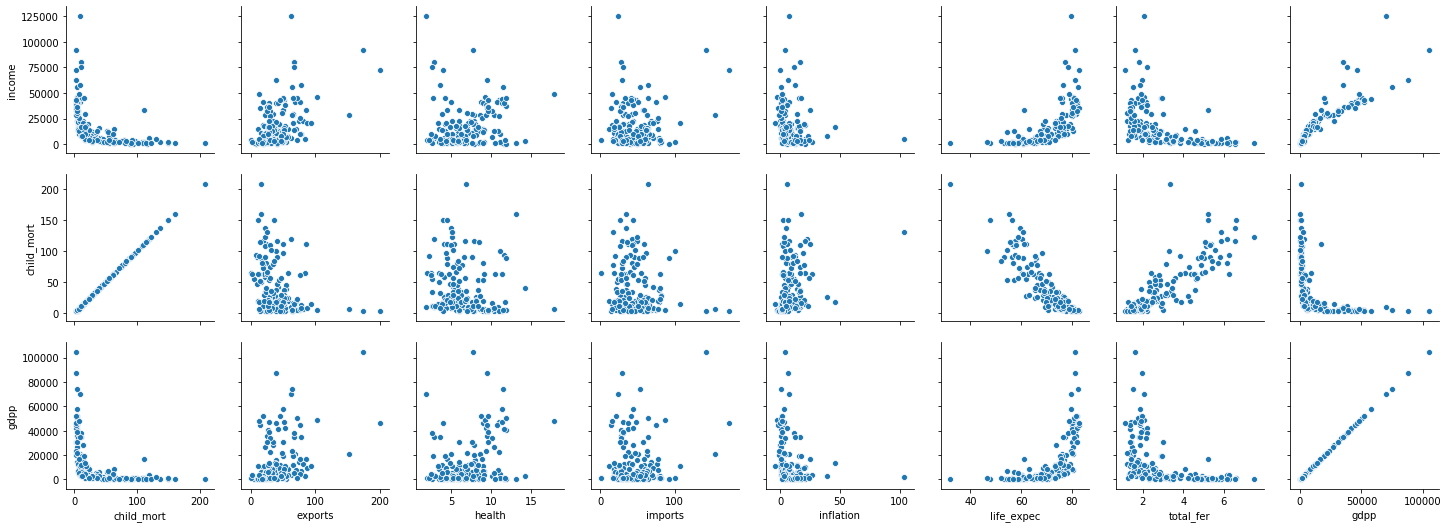

In [7]:
#visualizing the relation of gdpp, income and child_mort with other variables
plt.figure(figsize=(28,14))
sns.pairplot(x_vars=['child_mort','exports','health','imports','inflation','life_expec','total_fer','gdpp'],y_vars=['income','child_mort','gdpp'],data=Countries_df)

### Outlier Analysis

- As mentioned in the assignment performing outlier analysis before and after PCA

In [8]:
#check the spread of data of variables
Countries_df.describe(percentiles=[0.01,0.05,0.25,0.50,.75,.90,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


In [9]:
#create generic function which is used to plot box plot and kde plots 
'''
inputs-- dataframe,plot_type{'box' or 'kde'}, title of the plot
plots 3X3 subplots plot using dataframe, type of plot and title
'''
def plot_graph(dataframe,plot_type,title):
    columns=list(dataframe.columns)[1:]
    if(plot_type=='box'):
        columns=list(dataframe.columns)[1:]
        fig,axs=plt.subplots(3,3,figsize=(18,10))
        fig.subplots_adjust(top=0.95)
        fig.suptitle(title, fontsize=16)
        sns.boxplot(dataframe[columns[0]],orient='v',ax=axs[0,0])
        sns.boxplot(dataframe[columns[1]],orient='v',ax=axs[0,1])
        sns.boxplot(dataframe[columns[2]],orient='v',ax=axs[0,2])
        sns.boxplot(dataframe[columns[3]],orient='v',ax=axs[1,0])
        sns.boxplot(dataframe[columns[4]],orient='v',ax=axs[1,1])
        sns.boxplot(dataframe[columns[5]],orient='v',ax=axs[1,2])
        sns.boxplot(dataframe[columns[6]],orient='v',ax=axs[2,0])
        sns.boxplot(dataframe[columns[7]],orient='v',ax=axs[2,1])
        sns.boxplot(dataframe[columns[8]],orient='v',ax=axs[2,2])
    elif(plot_type=='kde'):
        columns=list(dataframe.columns)
        fig,axs=plt.subplots(3,3,figsize=(18,10))
        fig.subplots_adjust(top=0.95)
        fig.suptitle(title, fontsize=16)
        sns.kdeplot(dataframe[columns[0]],ax=axs[0,0])
        sns.kdeplot(dataframe[columns[1]],ax=axs[0,1])
        sns.kdeplot(dataframe[columns[2]],ax=axs[0,2])
        sns.kdeplot(dataframe[columns[3]],ax=axs[1,0])
        sns.kdeplot(dataframe[columns[4]],ax=axs[1,1])
        sns.kdeplot(dataframe[columns[5]],ax=axs[1,2])
        sns.kdeplot(dataframe[columns[6]],ax=axs[2,0])
        sns.kdeplot(dataframe[columns[7]],ax=axs[2,1])
        sns.kdeplot(dataframe[columns[8]],ax=axs[2,2])

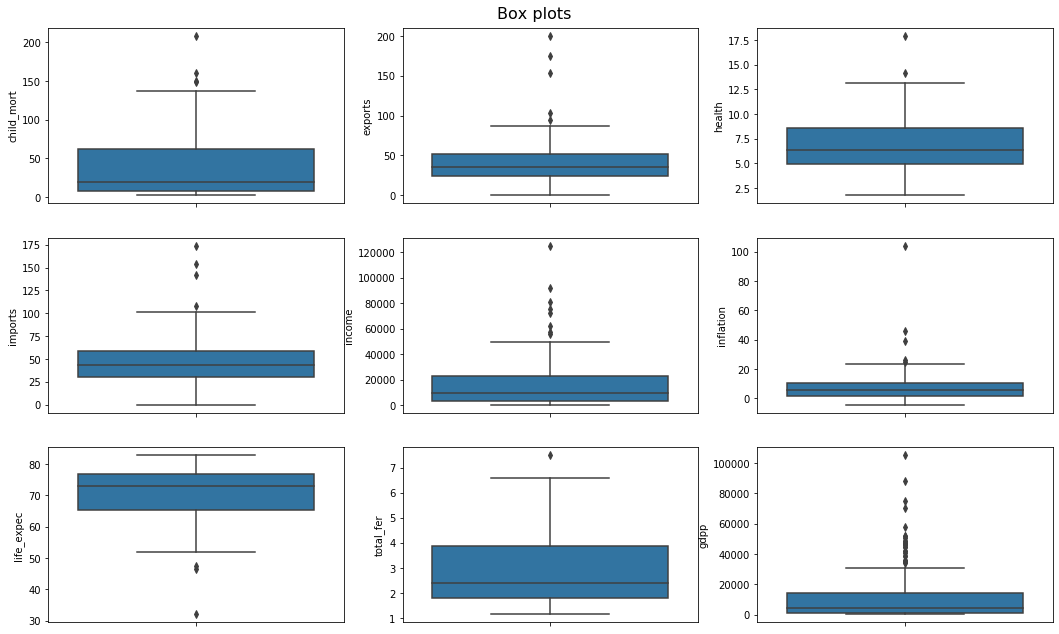

In [10]:
#visualizing the spread of data using box plots
plot_graph(Countries_df,'box','Box plots')

In [11]:
# Above graphs show outliers exist in the data

<Figure size 2016x1008 with 0 Axes>

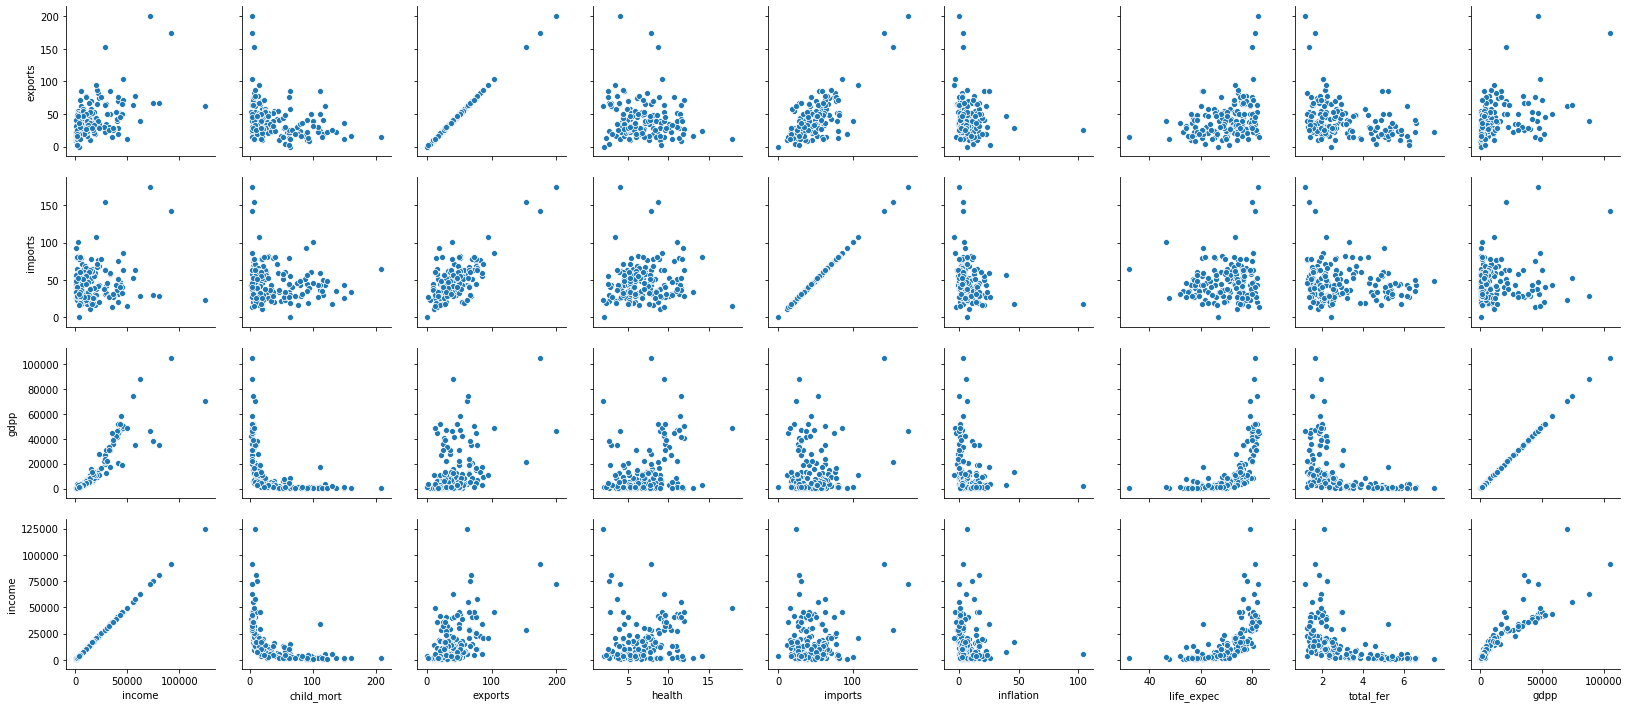

In [12]:
#checking the relation between the variables
#Using which we can perform outlier treat on those variables which won't impact business problem
plt.figure(figsize=(28,14))
sns.pairplot(x_vars=['income','child_mort','exports','health','imports','inflation','life_expec','total_fer','gdpp'],
             y_vars=['exports','imports','gdpp','income'],data=Countries_df)

In [13]:
## Assuming countries with high income, exports, imports, gdpp doesn't need aid

In [14]:
# So, removing statistical outliers for those variables only. so, that none of the underdeveloped countries gets removed

In [15]:
#removing outliers from income variable
Q1=np.quantile(Countries_df['income'],0.05)
Q3=np.quantile(Countries_df['income'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print((Q3 +  1.5*IQR))

-69402.49999999994
118905.4999999999


In [16]:
income_lower_limit=(Q1 - 1.5*IQR)
income_upper_limit=(Q3 + 1.5*IQR)

In [17]:
Countries_df[(Countries_df['income']>income_upper_limit) | (Countries_df['income']<income_lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [18]:
#removing outliers from gdpp variable
Q1=np.quantile(Countries_df['gdpp'],0.05)
Q3=np.quantile(Countries_df['gdpp'],0.95)
IQR = Q3 - Q1
print(Q1 - 1.5*IQR)
print((Q3 + 1.5*IQR))

-71750.25
120826.15


In [19]:
gdpp_lower_limit=(Q1 - 1.5*IQR)
gdpp_upper_limit=(Q3 + 1.5*IQR)

In [20]:
Countries_df[(Countries_df['gdpp']>gdpp_upper_limit) | (Countries_df['gdpp']<gdpp_lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [21]:
#removing outliers from exports variable
Q1=np.quantile(Countries_df['exports'],0.05)
Q3=np.quantile(Countries_df['exports'],0.95)
IQR = Q3 - Q1
print(Q1 - 1.5*IQR)
print((Q3 + 1.5*IQR))
exports_lower_limit=(Q1 - 1.5*IQR)
exports_upper_limit=(Q3 + 1.5*IQR)

-90.55499999999992
183.2449999999999


In [22]:
Countries_df[(Countries_df['exports']>exports_upper_limit) | (Countries_df['exports']<exports_lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [23]:
#removing outliers from imports variable
Q1=np.quantile(Countries_df['imports'],0.05)
Q3=np.quantile(Countries_df['imports'],0.95)
IQR = Q3 - Q1
print(Q1 - 1.5*IQR)
print((Q3 + 1.5*IQR))
imports_lower_limit=(Q1 - 1.5*IQR)
imports_upper_limit=(Q3 + 1.5*IQR)

-76.38499999999999
175.655


In [24]:
Countries_df[(Countries_df['imports']>imports_upper_limit) | (Countries_df['imports']<imports_lower_limit)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [25]:
#checking the countries which are removed after performing outlier analysis
Countries_df[(
    ((Countries_df['income']>income_upper_limit) | (Countries_df['income']<income_lower_limit)) | 
    ((Countries_df['gdpp']>gdpp_upper_limit) | (Countries_df['gdpp']<gdpp_lower_limit))|
    ((Countries_df['imports']>imports_upper_limit) | (Countries_df['imports']<imports_lower_limit))|
    ((Countries_df['exports']>exports_upper_limit) | (Countries_df['exports']<exports_lower_limit)))]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


- Notice above countires are developed countries as they have high income,high life_expec,exports,imports,gdpp and low child mort. We can remove them as it has not impact on business problem

In [26]:
#Creating a new dataframe with no outliers
Countries_df_without_outliers=Countries_df[~(
    ((Countries_df['income']>income_upper_limit) | (Countries_df['income']<income_lower_limit)) | 
    ((Countries_df['gdpp']>gdpp_upper_limit) | (Countries_df['gdpp']<gdpp_lower_limit))|
    ((Countries_df['imports']>imports_upper_limit) | (Countries_df['imports']<imports_lower_limit))|
    ((Countries_df['exports']>exports_upper_limit) | (Countries_df['exports']<exports_lower_limit)))]

In [27]:
#preview th shape
Countries_df_without_outliers.shape

(165, 10)

In [28]:
# 2 rows were removed as outliers

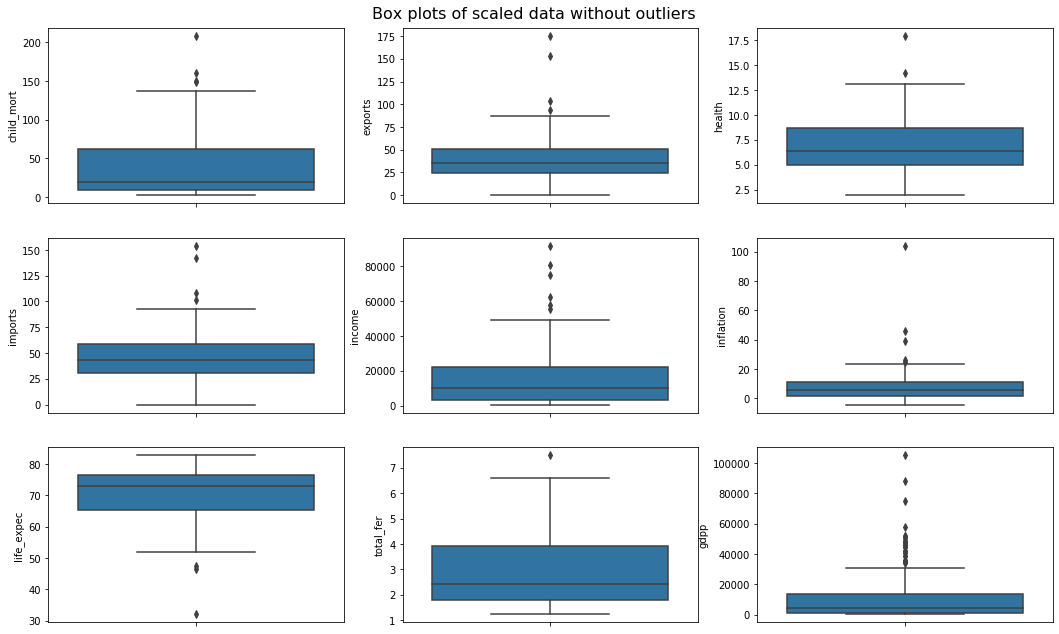

In [29]:
#visualizing the spread of data after performing outlier analysis using box plots
plot_graph(Countries_df_without_outliers,'box','Box plots of scaled data without outliers')

## Scaling Data

In [30]:
#scaling numerical data of countries df

In [31]:
#separating numerical columns to a new dataframe X
X=Countries_df.iloc[:,1:]

In [32]:
#previewing the data
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
#shape of the data without removing outliers
X.shape

(167, 9)

In [34]:
#Standardizing the data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
#Instantiation of StandardScaler
scaler=StandardScaler()

In [37]:
# scaling and transforming the original data to standard data having a mean 0 and standard deviation of 1
scaled_data=scaler.fit_transform(X)

In [38]:
#creating a dataframe with scaled data
scaled_df=pd.DataFrame(scaled_data,columns=X.columns)

In [39]:
#previewing the dataframe
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


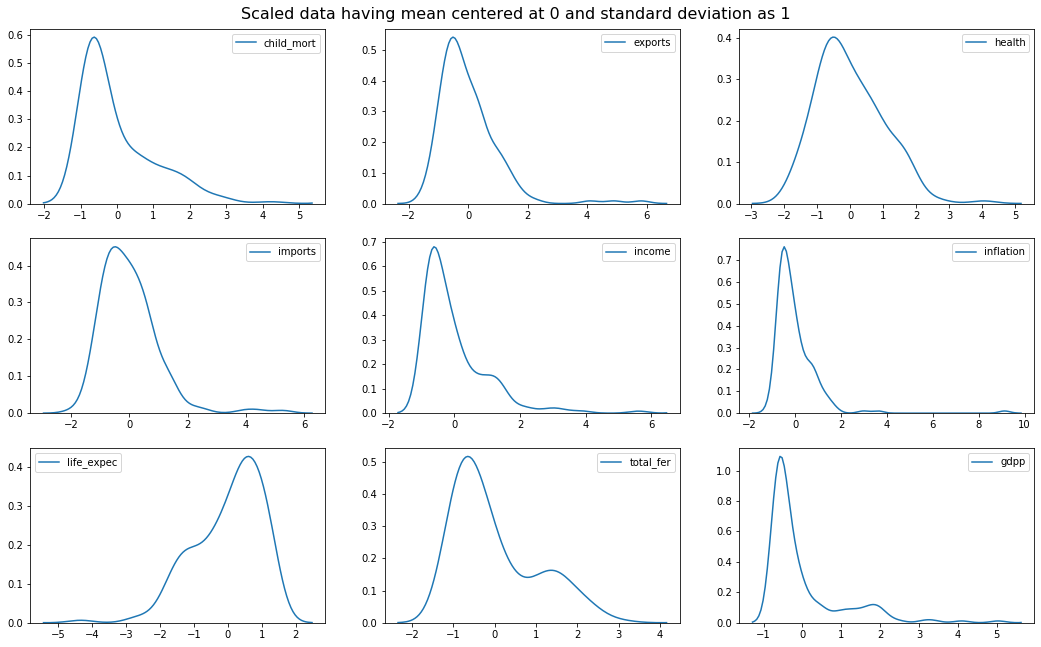

In [40]:
#visualizing the data spread after scaling
plot_graph(scaled_df,'kde','Scaled data having mean centered at 0 and standard deviation as 1')

In [41]:
#scaling numerical data of countries without outliers df

In [42]:
# separating numerical values from dataframe
X_without_outliers=Countries_df_without_outliers.iloc[:,1:]

In [43]:
X_without_outliers.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [44]:
#shape of the dataframe
X_without_outliers.shape

(165, 9)

In [45]:
#instantiate StandardScaler
scaler_without_outliers=StandardScaler()

In [46]:
# scaling and transforming the original data to standard data having a mean 0 and standard deviation of 1
scaled_data_without_outliers=scaler_without_outliers.fit_transform(X_without_outliers)

In [47]:
#creating a dataframe with scaled data without outliers
scaled_df_without_outliers=pd.DataFrame(scaled_data_without_outliers,columns=X_without_outliers.columns)

In [48]:
#previewing formed data frame
scaled_df_without_outliers.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.279156,-1.226432,0.263678,-0.061548,-0.863084,0.151714,-1.609209,1.890857,-0.672624
1,-0.547586,-0.491004,-0.115283,0.105925,-0.369485,-0.315936,0.664152,-0.870129,-0.472025
2,-0.282014,-0.066089,-0.990940,-0.672597,-0.193284,0.780915,0.686772,-0.049116,-0.451040
3,1.993968,0.910396,-1.476599,-0.152074,-0.608572,1.376105,-1.168109,2.115973,-0.503785
4,-0.703952,0.223996,-0.306603,0.572133,0.174542,-0.604084,0.720703,-0.552318,-0.012070


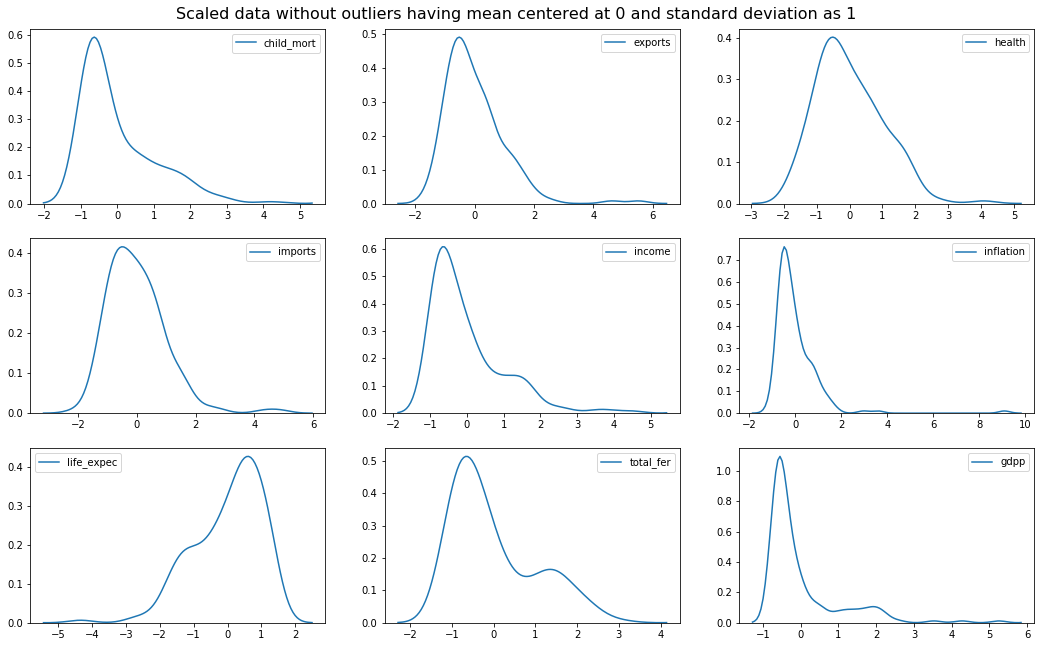

In [49]:
#visualizing the data spread after scaling
plot_graph(scaled_df_without_outliers,'kde','Scaled data without outliers having mean centered at 0 and standard deviation as 1')

## Principal Component Analysis

In [50]:
#Importing PCA and IncrementalPCA modules
from sklearn.decomposition import PCA,IncrementalPCA

In [51]:
#instantiate pca with a random state
pca=PCA(random_state=42)

In [52]:
#fit scaled data to pca
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
#Variance explained by different variables in descending order
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [54]:
#instantiate pca with a random state
pca_without_outlier=PCA(random_state=42)

In [55]:
#fitting scaled data without outliers to pca instance
pca_without_outlier.fit(scaled_data_without_outliers)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
#Variance explained by different variables in descending order
pca_without_outlier.explained_variance_ratio_

array([0.46285904, 0.16878175, 0.12790981, 0.11422943, 0.07003417,
       0.02503321, 0.01477075, 0.00952277, 0.00685907])

### Determining optimium components

### a.Scree plot

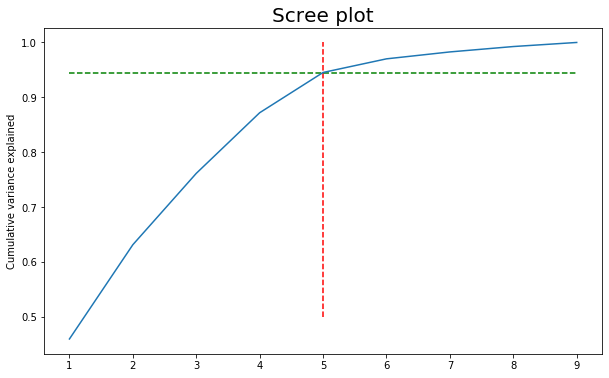

In [57]:
#plotting scree plot 
fig = plt.figure(figsize=[10,6])
plt.title("Scree plot",fontdict={'fontsize':20})
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0.5, colors="r", linestyles="--")
plt.hlines(y=0.945, xmax=9, xmin=1, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained")
plt.show()

- From above scree plot 5 componets explain about 94.5% data

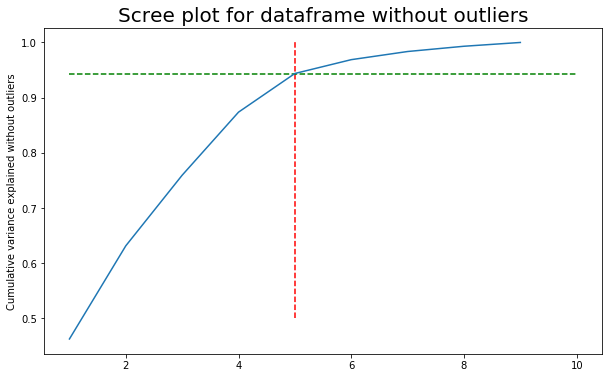

In [58]:
#plotting scree plot for dat a without outliers
fig = plt.figure(figsize=[10,6])
plt.title("Scree plot for dataframe without outliers",fontdict={'fontsize':20})
plt.plot(range(1,len(pca_without_outlier.explained_variance_ratio_)+1),np.cumsum(pca_without_outlier.explained_variance_ratio_))
plt.vlines(x=5, ymax=1, ymin=0.5, colors="r", linestyles="--")
plt.hlines(y=0.942, xmax=10, xmin=1, colors="g", linestyles="--")
plt.ylabel("Cumulative variance explained without outliers")
plt.show()

### b.Using percentage of variance

In [59]:
#unsupervised way of determining number of components for scaled data
pca_USV=PCA(0.945)

In [60]:
#transforming the data using PCA
scaled_df_USV=pca_USV.fit_transform(scaled_df)

In [61]:
#preview the shape of data
scaled_df_USV.shape

(167, 5)

- Both the method gave 5 components as optimum to explain 94.5% variance of scaled data

In [62]:
#unsupervised way of determining number of components for scaled data without outiers
pca_without_outliers_USV=PCA(0.942)

In [63]:
#transforming the data using PCA
scaled_df_without_outliers_USV=pca_without_outliers_USV.fit_transform(scaled_data_without_outliers)

In [64]:
#preview the shape of data
scaled_df_without_outliers_USV.shape

(165, 5)

- Both the method gave 5 components as optimum to explain 94.2% variance of scaled data with outliers

### Applying PCA to reduce dimensionality

In [65]:
#using incremental PCA to decrease memory and improve calculation performance
pca_Inc=IncrementalPCA(n_components=5)

In [66]:
#Fitting and transforming data to new basis in which explained variance is high
transformed_data=pca_Inc.fit_transform(scaled_df)

In [67]:
#preview shape of transformed data
transformed_data.shape

(167, 5)

In [68]:
# PCA has reduced dimensions from 9 columns to 5 columns

- Verifing the correlation after transformation using heatmap

In [69]:
correlation_mat=np.corrcoef(transformed_data.transpose())

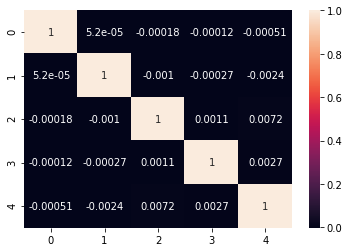

In [70]:
sns.heatmap(correlation_mat,annot=True)

- No correlation exist between the variables as all elements except diagonal elements are tending to zeros

In [71]:
#Applying incremental PCA on scaled data without outliers
pca_Inc_without_outlier=IncrementalPCA(n_components=5)

In [72]:
#Fitting and transforming data to new basis in which explained variance is high
transformed_data_without_ouliers=pca_Inc_without_outlier.fit_transform(scaled_data_without_outliers)

In [73]:
#previwing the shape of data
transformed_data_without_ouliers.shape

(165, 5)

In [74]:
# PCA has reduced dimensions from 9 columns to 5 columns

- Verifing the correlation after transformation using heatmap for scaled data without outliers

In [75]:
np.corrcoef(transformed_data_without_ouliers.transpose())

array([[ 1.00000000e+00,  4.72855893e-05,  1.59196176e-04,
        -1.73224209e-04, -6.32186130e-04],
       [ 4.72855893e-05,  1.00000000e+00,  1.15806470e-03,
        -6.15387335e-04, -2.91829292e-03],
       [ 1.59196176e-04,  1.15806470e-03,  1.00000000e+00,
        -1.91685922e-03, -7.77144286e-03],
       [-1.73224209e-04, -6.15387335e-04, -1.91685922e-03,
         1.00000000e+00,  5.17218891e-03],
       [-6.32186130e-04, -2.91829292e-03, -7.77144286e-03,
         5.17218891e-03,  1.00000000e+00]])

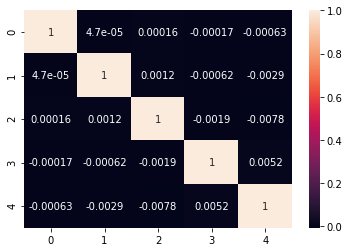

In [76]:
sns.heatmap(np.corrcoef(transformed_data_without_ouliers.transpose()),annot=True)

- No correlation exist between the variables as all elements except diagonal elements are tending to zeros

In [77]:
# viewing linear relation between original variables with transformed variables

In [78]:
pca_Inc.components_

array([[-0.41967749,  0.28371974,  0.15090765,  0.16157087,  0.39861811,
        -0.1928264 ,  0.42549267, -0.40396116,  0.39266855],
       [ 0.19312245,  0.61357956, -0.24350339,  0.67130924,  0.02407378,
        -0.00332551, -0.22455856,  0.15219983, -0.04573737],
       [-0.03436069,  0.14687014, -0.6044529 , -0.30913862,  0.30002773,
         0.62984364,  0.12047131,  0.02795883,  0.11959861],
       [ 0.37107257,  0.00490633,  0.45432934, -0.07721714,  0.39426589,
         0.14920805, -0.19996777,  0.38322405,  0.53417883],
       [-0.18390053,  0.07043899,  0.51574709,  0.24222051, -0.25069755,
         0.71769058,  0.13980886, -0.08575814, -0.17810981]])

In [79]:
#linear relation of PC components with variables
pd.DataFrame(pca_Inc.components_,columns=scaled_df.columns,index=['PC1','PC2','PC3','PC4','PC5'])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.419677,0.283720,0.150908,0.161571,0.398618,-0.192826,0.425493,-0.403961,0.392669
PC2,0.193122,0.613580,-0.243503,0.671309,0.024074,-0.003326,-0.224559,0.152200,-0.045737
PC3,-0.034361,0.146870,-0.604453,-0.309139,0.300028,0.629844,0.120471,0.027959,0.119599
PC4,0.371073,0.004906,0.454329,-0.077217,0.394266,0.149208,-0.199968,0.383224,0.534179
PC5,-0.183901,0.070439,0.515747,0.242221,-0.250698,0.717691,0.139809,-0.085758,-0.178110


In [80]:
#creating a data frame with columns as new PCA components
transformed_df=pd.DataFrame(transformed_data,columns=['PC'+str(i) for i in range(1,pca_Inc.n_components_+1)])

In [81]:
#previewing the data frame
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [82]:
#Components of scaled data without outliers
pca_Inc_without_outlier.components_

array([[-0.4201525 ,  0.26623189,  0.18577288,  0.13668065,  0.40920661,
        -0.18981806,  0.42411874, -0.40242592,  0.39254939],
       [ 0.15720394,  0.60960587, -0.15435595,  0.71271304, -0.0265733 ,
        -0.06530401, -0.21960038,  0.12181797, -0.0620263 ],
       [ 0.10125074, -0.25322521,  0.66243377,  0.22147505, -0.19465181,
        -0.61349347, -0.14715938,  0.042829  , -0.00134247],
       [ 0.36281057,  0.072677  ,  0.35332578, -0.09939806,  0.41616935,
         0.31395785, -0.18608874,  0.38672981,  0.52193107],
       [-0.20889666,  0.00496613,  0.53279593,  0.25177223, -0.26754989,
         0.67304829,  0.14365547, -0.10809353, -0.22842662]])

In [83]:
#linear relation of PC components with variables
pd.DataFrame(pca_Inc_without_outlier.components_,columns=scaled_df_without_outliers.columns,
             index=['PC1','PC2','PC3','PC4','PC5'])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC1,-0.420152,0.266232,0.185773,0.136681,0.409207,-0.189818,0.424119,-0.402426,0.392549
PC2,0.157204,0.609606,-0.154356,0.712713,-0.026573,-0.065304,-0.219600,0.121818,-0.062026
PC3,0.101251,-0.253225,0.662434,0.221475,-0.194652,-0.613493,-0.147159,0.042829,-0.001342
PC4,0.362811,0.072677,0.353326,-0.099398,0.416169,0.313958,-0.186089,0.386730,0.521931
PC5,-0.208897,0.004966,0.532796,0.251772,-0.267550,0.673048,0.143655,-0.108094,-0.228427


In [84]:
#creating a data frame with columns as new PCA components for scaled data without ooutliers
transformed_df_without_outliers=pd.DataFrame(transformed_data_without_ouliers,
                                    columns=['PC'+str(i) for i in range(1,pca_Inc_without_outlier.n_components_+1)])

In [85]:
#previewing the data frame
transformed_df_without_outliers.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.912825,0.007353,0.994739,0.842326,-0.097198
1,0.447734,-0.484230,0.147360,-1.245035,0.260700
2,-0.268469,-0.585717,-1.361241,-0.607862,0.145577
3,-2.945433,1.459815,-1.503047,1.234504,-0.429468
4,1.085925,0.290989,0.002541,-0.875351,-0.158428


### Outlier Analysis after performing PCA

In [86]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


In [87]:
#check the spread of data with mulitple percentiles
transformed_df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.99]).round(5)

,PC1,PC2,PC3,PC4,PC5
count,167.00000,167.00000,167.00000,167.00000,167.00000
mean,0.00000,-0.00000,0.00000,0.00000,0.00000
std,2.03975,1.24725,1.08496,1.00037,0.81425
min,-4.90949,-2.99870,-2.74296,-1.59156,-2.81524
1%,-4.11604,-2.24768,-2.46208,-1.42306,-1.56821
5%,-3.07962,-1.76976,-1.44480,-1.18195,-1.16553
10%,-2.84223,-1.41998,-1.00202,-1.08389,-0.78128
25%,-1.38226,-0.75127,-0.52934,-0.78535,-0.39693
50%,0.02289,-0.09337,-0.23430,-0.30791,-0.07038
75%,1.22424,0.55051,0.41366,0.72648,0.28258


In [88]:
#created a boxplot function which takes dataframe as input and plots 2X3 subplots of box plots
def box_plot(dataframe):
    columns=list(dataframe.columns)
    fig,axs=plt.subplots(2,3,figsize=(18,10))
    fig.subplots_adjust(top=0.95)
    fig.suptitle("Box plots", fontsize=16)
    sns.boxplot(dataframe[columns[0]],orient='v',ax=axs[0,0])
    sns.boxplot(dataframe[columns[1]],orient='v',ax=axs[0,1])
    sns.boxplot(dataframe[columns[2]],orient='v',ax=axs[0,2])
    sns.boxplot(dataframe[columns[3]],orient='v',ax=axs[1,0])
    sns.boxplot(dataframe[columns[4]],orient='v',ax=axs[1,1])

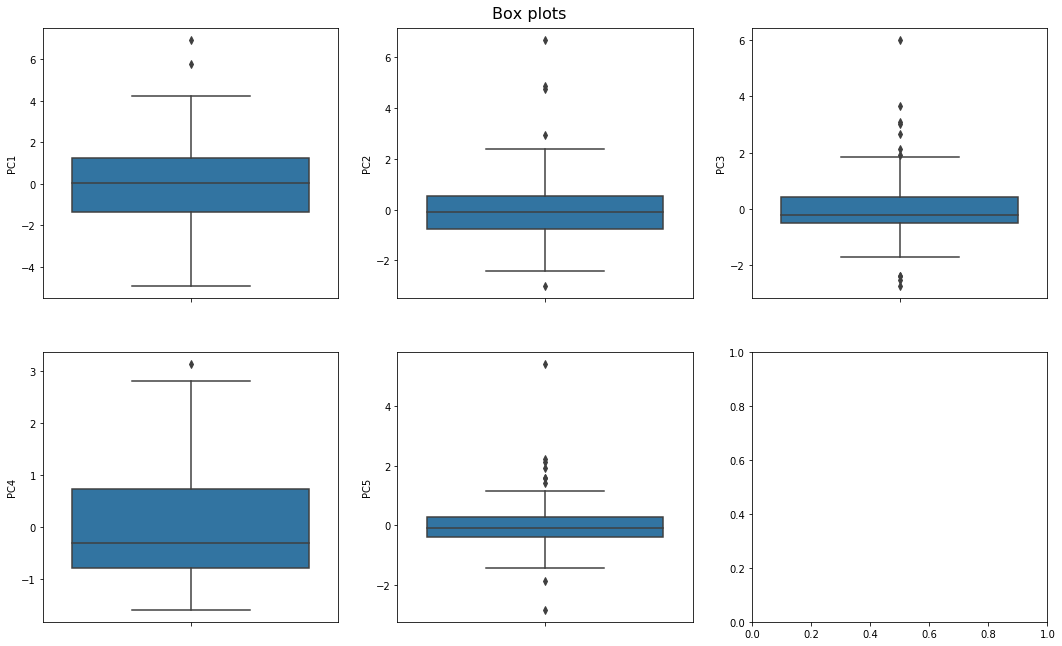

In [89]:
#visualizing the spread after applying PCA
box_plot(transformed_df)

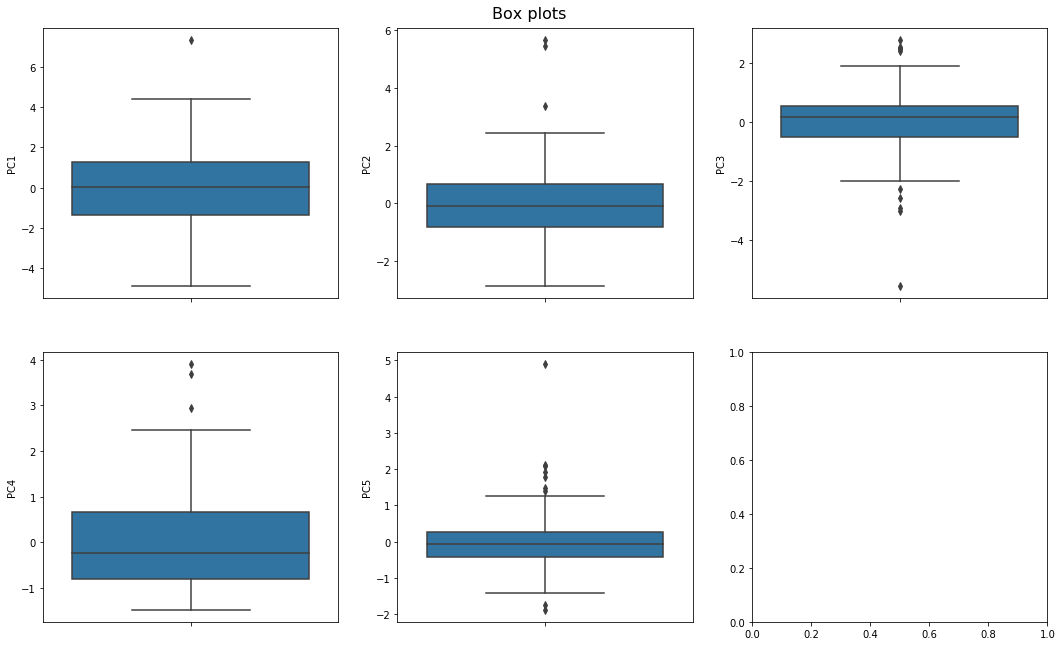

In [90]:
#visualizing spread of data after applying PCA
box_plot(transformed_df_without_outliers)

### Removing outliers after PCA transformation

In [91]:
#statistically removing outliers from each component

In [92]:
#removing outliers from PC1
Q1=np.quantile(transformed_df_without_outliers['PC1'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC1'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q3 + 1.5*IQR)
PC1_lower_limit=(Q1 - 1.5*IQR)
PC1_upper_limit=(Q3 + 1.5*IQR)

-12.508086731732613
12.589523141138116


In [93]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC1']>PC1_upper_limit) |
                                (transformed_df_without_outliers['PC1']<PC1_lower_limit)]

,PC1,PC2,PC3,PC4,PC5


In [94]:
#removing outliers from PC2
Q1=np.quantile(transformed_df_without_outliers['PC2'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC2'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q3 + 1.5*IQR)
PC2_lower_limit=(Q1 - 1.5*IQR)
PC2_upper_limit=(Q3 + 1.5*IQR)

-6.913985822230331
6.887978432804923


In [95]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC2']>PC2_upper_limit) | 
                                (transformed_df_without_outliers['PC2']<PC2_lower_limit)]

,PC1,PC2,PC3,PC4,PC5


In [96]:
#removing outliers from PC3
Q1=np.quantile(transformed_df_without_outliers['PC3'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC3'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q3 + 1.5*IQR)
PC3_lower_limit=(Q1 - 1.5*IQR)
PC3_upper_limit=(Q3 + 1.5*IQR)

-7.123579431817784
6.918052922862199


In [97]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC3']>PC3_upper_limit) | 
                                (transformed_df_without_outliers['PC3']<PC3_lower_limit)]

,PC1,PC2,PC3,PC4,PC5


In [98]:
#removing outliers from PC4
Q1=np.quantile(transformed_df_without_outliers['PC4'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC4'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q3 + 1.5*IQR)
PC4_lower_limit=(Q1 - 1.5*IQR)
PC4_upper_limit=(Q3 + 1.5*IQR)

-5.390386672886442
5.8452698213959975


In [99]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC4']>PC4_upper_limit) | 
                                (transformed_df_without_outliers['PC4']<PC4_lower_limit)]

,PC1,PC2,PC3,PC4,PC5


In [100]:
#removing outliers from PC5
Q1=np.quantile(transformed_df_without_outliers['PC5'],0.05)
Q3=np.quantile(transformed_df_without_outliers['PC5'],0.95)
IQR = Q3 - Q1
print((Q1 - 1.5*IQR))
print(Q3 + 1.5*IQR)
PC5_lower_limit=(Q1 - 1.5*IQR)
PC5_upper_limit=(Q3 + 1.5*IQR)

-4.742379034875508
4.738428150466795


In [101]:
transformed_df_without_outliers[(transformed_df_without_outliers['PC5']>PC5_upper_limit) | 
                                (transformed_df_without_outliers['PC5']<PC5_lower_limit)]

,PC1,PC2,PC3,PC4,PC5
113,-4.872434,-0.901287,-5.54364,3.902957,4.896049


In [102]:
#rows removed after performing outlier analysis
temp=transformed_df_without_outliers[(
(transformed_df_without_outliers['PC1']>PC1_upper_limit) | (transformed_df_without_outliers['PC1']<PC1_lower_limit)|
(transformed_df_without_outliers['PC2']>PC2_upper_limit) | (transformed_df_without_outliers['PC2']<PC2_lower_limit)|
(transformed_df_without_outliers['PC3']>PC3_upper_limit) | (transformed_df_without_outliers['PC3']<PC3_lower_limit)|
(transformed_df_without_outliers['PC4']>PC4_upper_limit) | (transformed_df_without_outliers['PC4']<PC4_lower_limit)|
(transformed_df_without_outliers['PC5']>PC5_upper_limit) | (transformed_df_without_outliers['PC5']<PC5_lower_limit))]


In [103]:
temp

,PC1,PC2,PC3,PC4,PC5
113,-4.872434,-0.901287,-5.54364,3.902957,4.896049


In [104]:
list(Countries_df.iloc[list(temp.index),:]['country'].values)

['Nigeria']

In [105]:
#created a new dataframe after removing the outliers on the transformed data after applying PCA
transformed_df_without_outliers_after_pca=transformed_df_without_outliers[~(
(transformed_df_without_outliers['PC1']>PC1_upper_limit) | (transformed_df_without_outliers['PC1']<PC1_lower_limit)|
(transformed_df_without_outliers['PC2']>PC2_upper_limit) | (transformed_df_without_outliers['PC2']<PC2_lower_limit)|
(transformed_df_without_outliers['PC3']>PC3_upper_limit) | (transformed_df_without_outliers['PC3']<PC3_lower_limit)|
(transformed_df_without_outliers['PC4']>PC4_upper_limit) | (transformed_df_without_outliers['PC4']<PC4_lower_limit)|
(transformed_df_without_outliers['PC5']>PC5_upper_limit) | (transformed_df_without_outliers['PC5']<PC5_lower_limit))]


In [106]:
#preview the data
transformed_df_without_outliers_after_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.912825,0.007353,0.994739,0.842326,-0.097198
1,0.447734,-0.484230,0.147360,-1.245035,0.260700
2,-0.268469,-0.585717,-1.361241,-0.607862,0.145577
3,-2.945433,1.459815,-1.503047,1.234504,-0.429468
4,1.085925,0.290989,0.002541,-0.875351,-0.158428


In [107]:
#previewing thw shape of data
transformed_df_without_outliers_after_pca.shape

(164, 5)

In [108]:
Countries_df_without_outliers_after_pca=Countries_df_without_outliers.copy()

In [109]:
# # removing the data from original dataframe as well to using it for labelling
Countries_df_without_outliers_after_pca=Countries_df_without_outliers_after_pca.set_index('country').drop(list(Countries_df.iloc[list(temp.index),:]['country'].values)).reset_index()

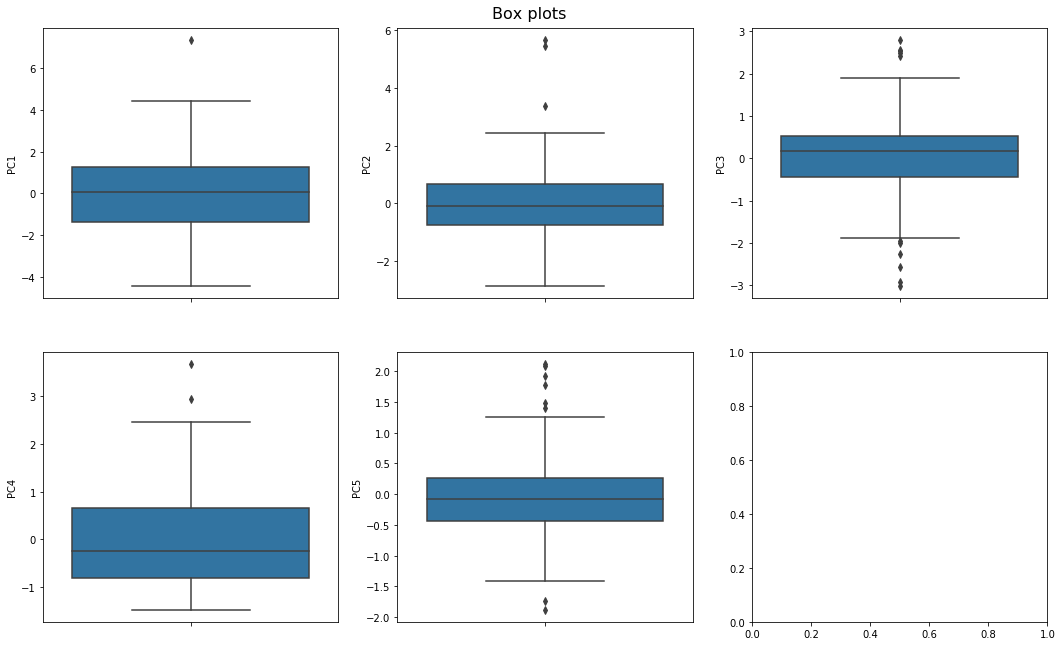

In [110]:
# visualizing the data after removing outliers 
box_plot(transformed_df_without_outliers_after_pca)

#### Hopkins Test

In [111]:
# function that performs Hopkins test returns cluster tendency values
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)#437 unique samples from 4372 
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [112]:
hopkins(transformed_df)

0.8301130666668189

In [113]:
##it signifies data can be cluster

In [114]:
hopkins(transformed_df_without_outliers_after_pca)

0.731936963643327

In [115]:
#its signifies data can be cluster

### Clustering

## KMeans clustering

In [116]:
#importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [117]:
#creating a kmeans instance with number of cluster as 5   
kmeans=KMeans(n_clusters=5,max_iter=100,random_state=42)

In [118]:
#fitting the data
kmeans.fit(transformed_df.iloc[:,:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [119]:
#preview the output label
kmeans.labels_

array([1, 4, 0, 1, 4, 0, 0, 3, 3, 0, 4, 4, 0, 4, 4, 3, 4, 1, 4, 0, 4, 1,
       0, 3, 4, 1, 1, 4, 1, 3, 4, 1, 1, 0, 0, 0, 1, 1, 1, 4, 1, 4, 4, 4,
       3, 0, 0, 0, 0, 1, 1, 4, 4, 3, 3, 1, 1, 4, 3, 1, 3, 0, 0, 1, 1, 4,
       1, 4, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 4, 0, 1, 1, 3, 4, 1, 4, 4, 1,
       1, 0, 4, 2, 4, 1, 1, 4, 4, 1, 2, 1, 4, 4, 4, 0, 4, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 4, 4, 0, 0, 4, 3, 3, 0, 0, 1, 0, 0, 1, 4, 4,
       1, 2, 4, 4, 4, 1, 4, 3, 0, 0, 1, 0, 3, 3, 0, 1, 4, 1, 1, 0, 4, 0,
       0, 1, 4, 3, 3, 3, 0, 0, 0, 0, 4, 1, 1])

### Determining optmium K value

#### a.Elbow Curve

In [120]:
def elbow_curve(dataframe,title):
    ssd=[]
    range_clusters=[2,3,4,5,6,7,8,9,10]
    for num_cluster in range_clusters:
        kmeans=KMeans(num_cluster,max_iter=100,random_state=42)
        kmeans.fit(dataframe)
        ssd.append(kmeans.inertia_)
    plt.title(title)
    plt.plot(range_clusters,ssd)
    plt.show()

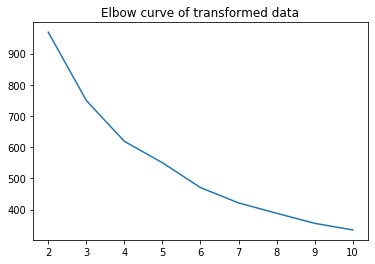

In [121]:
elbow_curve(transformed_df, "Elbow curve of transformed data")

## b. Silhoutte score

In [122]:
def SilhoutteScore(dataframe):
    score=[]
    for num_clusters in [2,3,4,5,6,7,8,9]:
        kmeans=KMeans(num_clusters,max_iter=100,random_state=42)
        kmeans.fit(dataframe.iloc[:,:5])
        score.append(silhouette_score(dataframe.iloc[:,:5],kmeans.labels_))
        print("Silhoutte score for {0} clusters is {1}".format(num_clusters,score[num_clusters-2]))
    plt.title("Sihoutte score")
    plt.plot([2,3,4,5,6,7,8,9],score)

Silhoutte score for 2 clusters is 0.304339954285527
Silhoutte score for 3 clusters is 0.3079553690964611
Silhoutte score for 4 clusters is 0.32718863090038236
Silhoutte score for 5 clusters is 0.24893752149058984
Silhoutte score for 6 clusters is 0.2592124946928743
Silhoutte score for 7 clusters is 0.2779717907933757
Silhoutte score for 8 clusters is 0.2489270342828852
Silhoutte score for 9 clusters is 0.24461008596308487


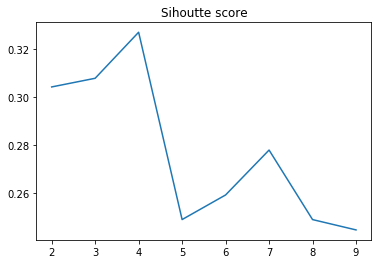

In [123]:
SilhoutteScore(transformed_df.iloc[:,:5])

- Based on silhoutte and elbow curve, going with 4 clusters, on dataframe without removing outliers

#### Determining optmium K value for scaled data for without outliers

In [124]:
#creating a kmeans instance with number of cluster as 5  
kmeans_without_outliers_after_pca=KMeans(n_clusters=5,max_iter=100,random_state=42)

In [125]:
#fitting the scaled data without outliers
kmeans_without_outliers_after_pca.fit(transformed_df_without_outliers_after_pca.iloc[:,:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [126]:
#preview the output label
kmeans_without_outliers_after_pca.labels_

array([1, 3, 4, 1, 3, 4, 4, 2, 2, 4, 3, 3, 4, 3, 3, 2, 3, 1, 3, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 1, 2, 3, 1, 1, 4, 4, 4, 1, 1, 1, 3, 1, 3, 2, 3,
       2, 4, 4, 4, 3, 1, 1, 3, 3, 2, 2, 4, 1, 3, 2, 1, 2, 3, 4, 1, 1, 3,
       1, 3, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 3, 4, 1, 1, 2, 3, 1, 3, 3, 1,
       1, 4, 3, 0, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4,
       2, 2, 1, 2, 4, 1, 3, 3, 4, 4, 3, 2, 4, 4, 1, 3, 4, 1, 3, 3, 1, 3,
       3, 3, 1, 3, 2, 4, 3, 1, 3, 2, 2, 4, 1, 3, 1, 1, 4, 3, 4, 3, 1, 3,
       2, 2, 2, 4, 4, 3, 4, 3, 1, 1])

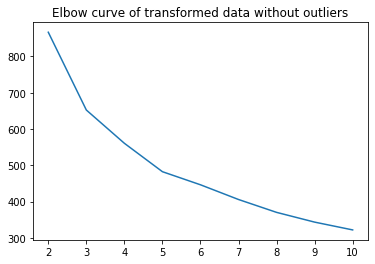

In [127]:
elbow_curve(transformed_df_without_outliers_after_pca.iloc[:,:5],"Elbow curve of transformed data without outliers")

Silhoutte score for 2 clusters is 0.30415352723583716
Silhoutte score for 3 clusters is 0.3112526227990781
Silhoutte score for 4 clusters is 0.32332765159558824
Silhoutte score for 5 clusters is 0.26660391194523925
Silhoutte score for 6 clusters is 0.2346516939475289
Silhoutte score for 7 clusters is 0.2228865527319947
Silhoutte score for 8 clusters is 0.2552468656354038
Silhoutte score for 9 clusters is 0.23660169927926822


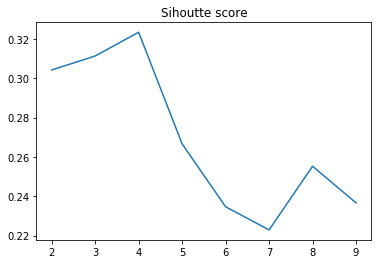

In [128]:
SilhoutteScore(transformed_df_without_outliers_after_pca.iloc[:,:5])

In [129]:
#Elbow curve gives 3 and 5
#SilhoutteScore gives 3 and 4

- Based on silhoutte and elbow curve, going with 3 clusters for data without outiers after pca

###  Model Building 

In [130]:
#model for scaled data
kmeans=KMeans(n_clusters=4,max_iter=500,random_state=42)
kmeans.fit(transformed_df.iloc[:,:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [131]:
Cluster_id=kmeans.labels_

In [132]:
transformed_df['ClusterId']=Cluster_id

In [133]:
#model for scaled data without outliers after pca
kmeans_without_outliers_after_pca=KMeans(n_clusters=3,max_iter=500,random_state=42)
kmeans_without_outliers_after_pca.fit(transformed_df_without_outliers_after_pca.iloc[:,:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [134]:
ClusterId_without_outliers_after_pca=kmeans_without_outliers_after_pca.labels_

In [135]:
transformed_df_without_outliers_after_pca['ClusterId']=ClusterId_without_outliers_after_pca

In [136]:
#merging the labels with original dataframe
Countries_df['ClusterId']=Cluster_id

In [137]:
#merging the output labels with original dataframe of without outliers
Countries_df_without_outliers_after_pca['ClusterId']=ClusterId_without_outliers_after_pca

In [138]:
Countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [139]:
Countries_df_without_outliers_after_pca.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Data insights

In [140]:
#created lists color maps to use in palettes
colors_map2=['red','green']
colors_map3=['green','blue','red']
colors_map4=['orange','red','indigo','green']
colors_map5=['red','green','blue','orange','purple']
colors_map6=['violet','indigo','blue','green','orange','red']
colors_map7=['violet','indigo','blue','green','black','orange','red']
colors_map8=['violet','indigo','blue','green','yellow','orange','red','black']

In [141]:
def clusterplot(dataframe,hue,colormap):
    plt.figure(figsize=(12,8))
    plt.title("Cluster plot")
    sns.scatterplot('PC1','PC2',hue=hue,data=dataframe,palette=colormap)

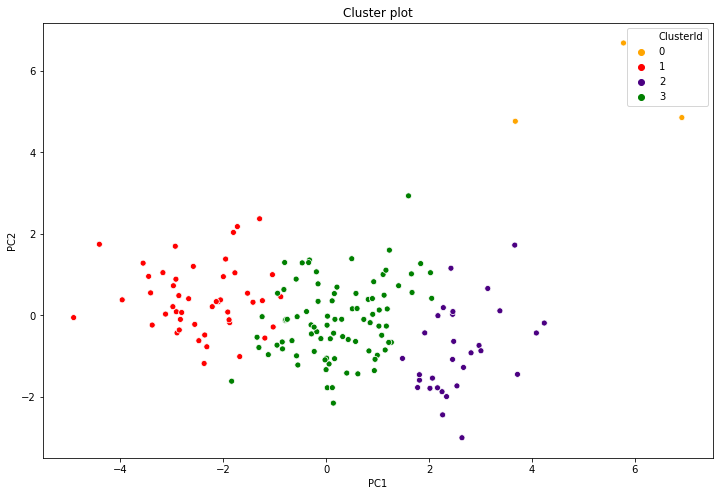

In [142]:
clusterplot(transformed_df,'ClusterId',colors_map4)

In [143]:
#gdpp

In [144]:
def box_scatterplot(dataframe,colormap,box_x,box_y,scatter_x):
    fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
    sns.boxplot(box_x,box_y,data=dataframe,ax=axs[0],palette=colormap)
    sns.scatterplot(scatter_x,box_y,hue=box_x,palette=colormap,data=dataframe,ax=axs[1])

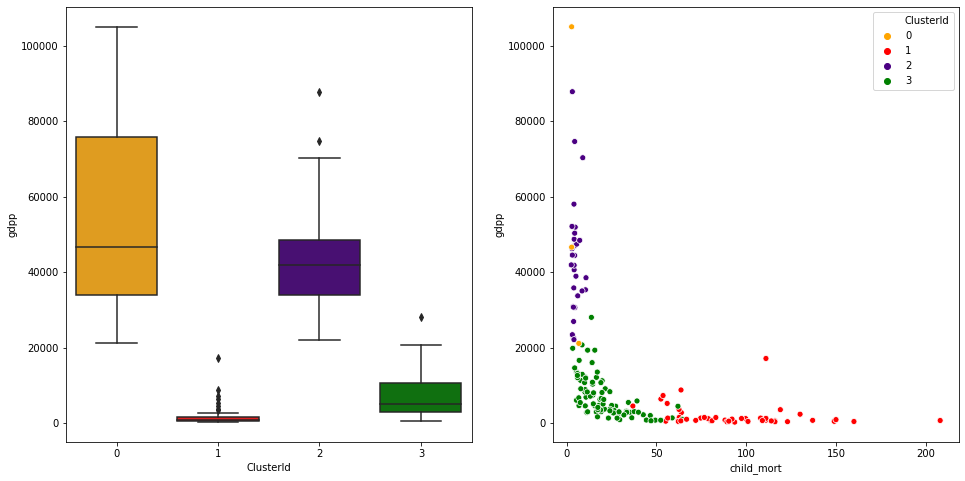

In [145]:
box_scatterplot(Countries_df,colors_map4,'ClusterId','gdpp','child_mort')

In [146]:
#child_mort

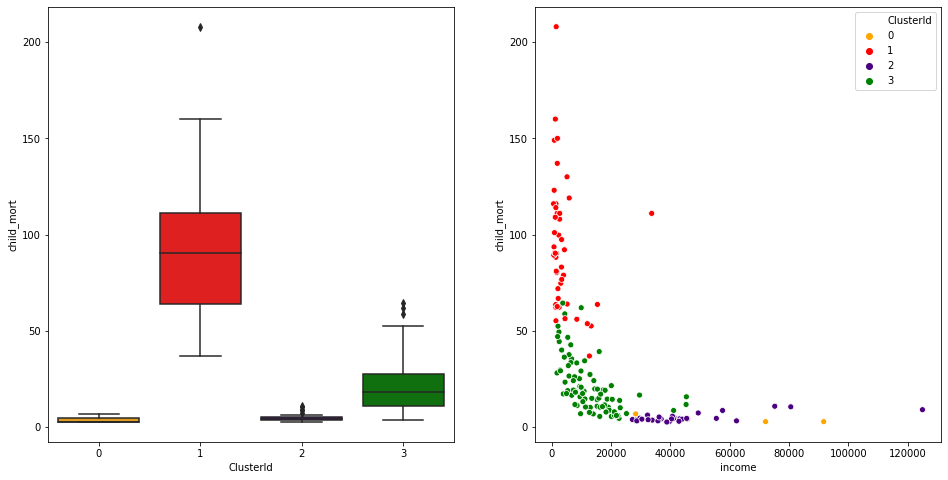

In [147]:
box_scatterplot(Countries_df,colors_map4,'ClusterId','child_mort','income')

In [148]:
#income

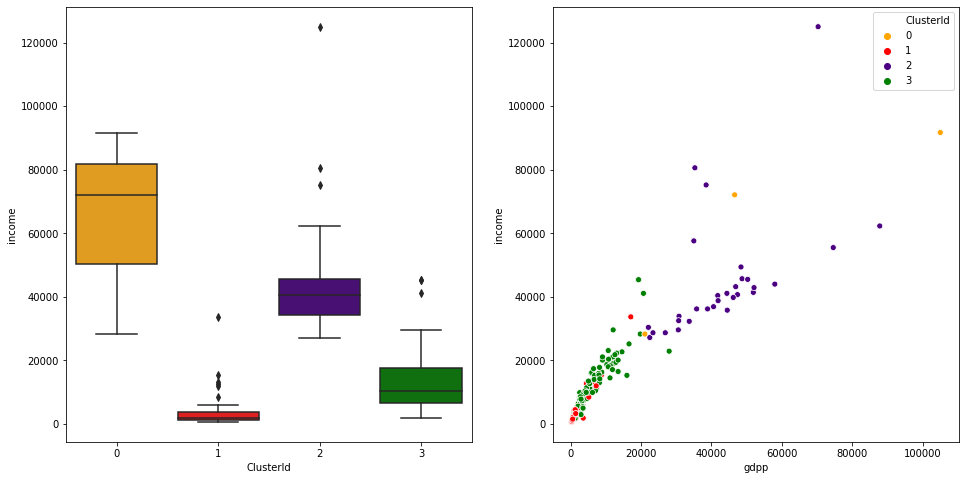

In [149]:
box_scatterplot(Countries_df,colors_map4,'ClusterId','income','gdpp')

- high child mortality, low income and low gdpp

#### From above box plots, cluster Id with high child mortality, low income and low gdpp is the cluster have countries that are in needs aid

In [150]:
#number of data points in clusters groups
Countries_df.groupby('ClusterId').count()['country']

ClusterId
0     3
1    47
2    30
3    87
Name: country, dtype: int64

In [151]:
Countries_df[Countries_df['ClusterId']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


- List of countries that need financial aid as per data without removal of outliers

In [152]:
Countries_df[Countries_df['ClusterId']==1]['country'].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [153]:
#Data insights uisng scaled data without outliers

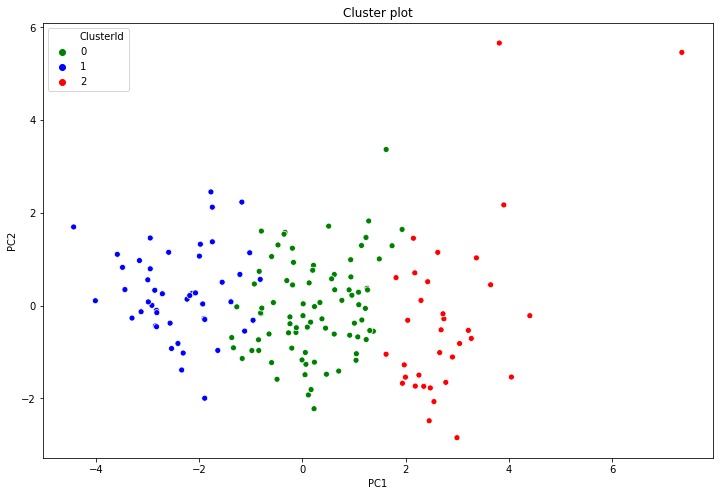

In [154]:
clusterplot(transformed_df_without_outliers_after_pca,'ClusterId',colors_map3)

In [155]:
## Box plot for the data without outliers after pca

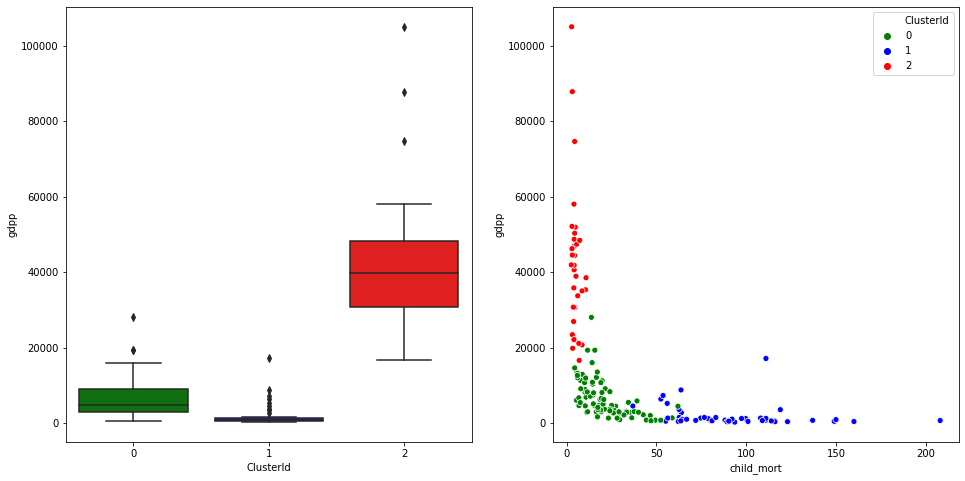

In [156]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId','gdpp','child_mort')

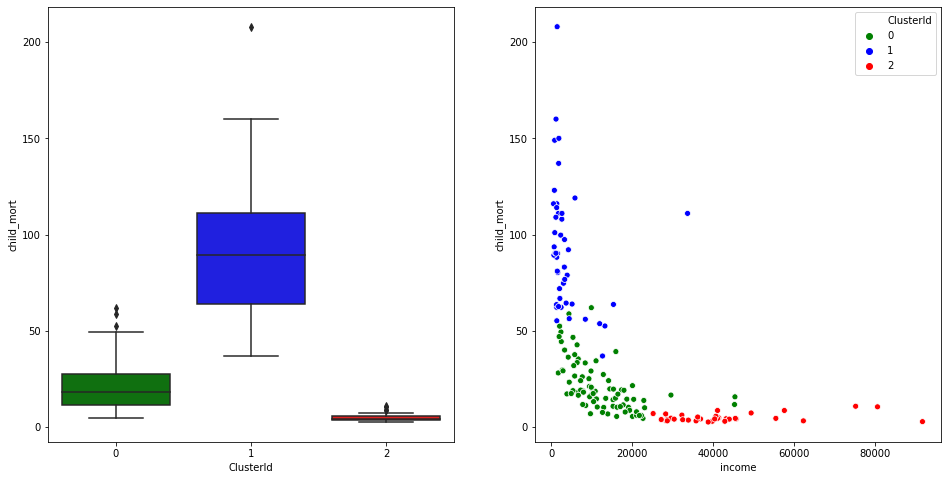

In [157]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId','child_mort','income')

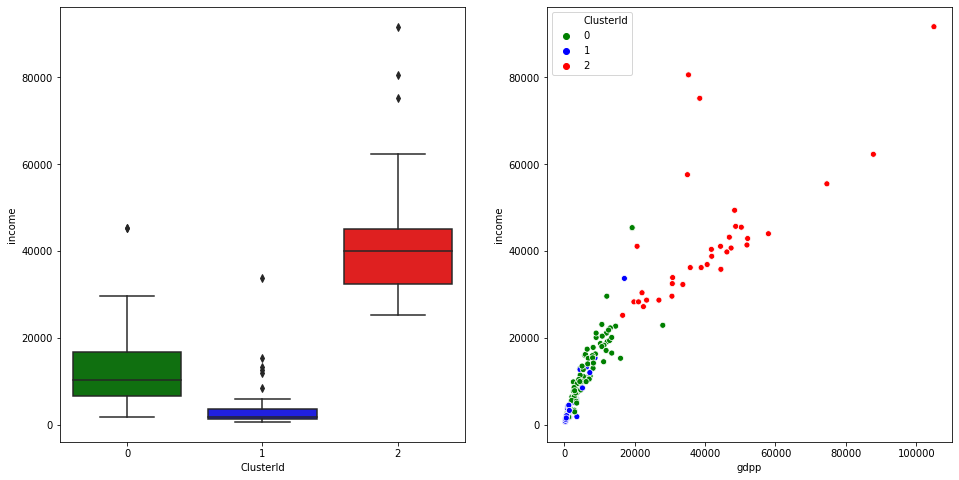

In [158]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map3,'ClusterId','income','gdpp')

#### From above box plots, cluster Id with high child mortality, low income and low gdpp is the cluster have countries that are in needs aid

In [159]:
Countries_df_without_outliers_after_pca.groupby('ClusterId').count()['country']

ClusterId
0    83
1    47
2    34
Name: country, dtype: int64

In [160]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1


- List of countries that need financial aid as per transformed data without outliers after pca analysis

In [161]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId']==1]['country'].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

## Hierarchical Clustering

In [162]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3


In [163]:
#importing required libraries to perform hierarchical clustering
from scipy.cluster.hierarchy import linkage,cut_tree,dendrogram

### Single linkage

In [164]:
#creating a single linkage on transformed data
single_linkage=linkage(transformed_df.iloc[:,:5],method='single')

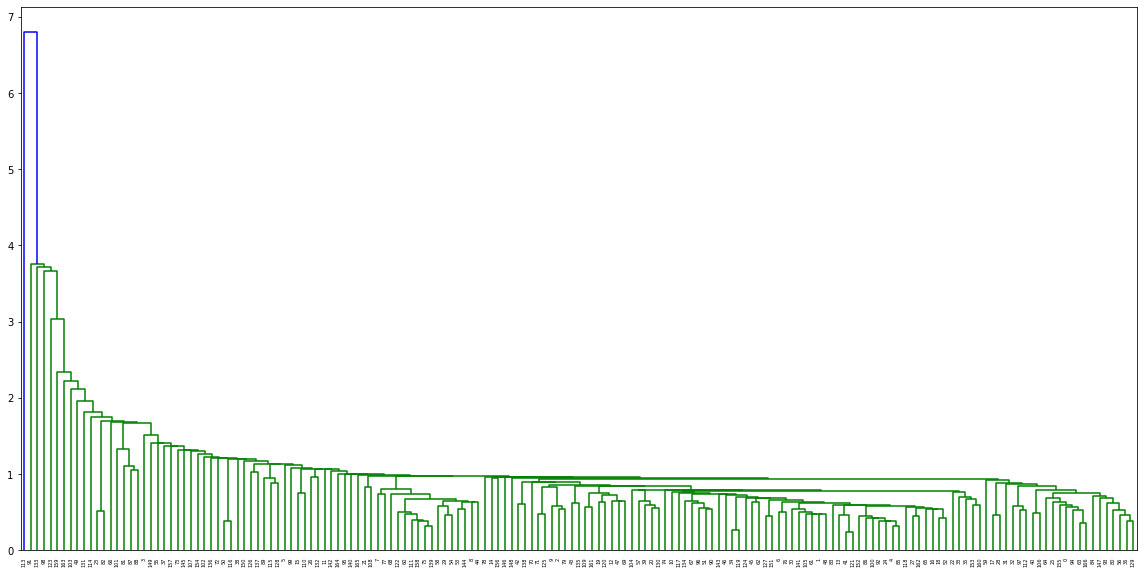

In [165]:
#ploting the formed single linkage dendogram
plt.figure(figsize=(20,10))
dendrogram(single_linkage)
plt.show()

In [166]:
#cutting the tree to form 4 clusters  
single_cluster_labels=cut_tree(single_linkage,n_clusters=4).reshape(-1,)

In [167]:
#adding the output labels to transformed dataframe
transformed_df['ClusterId(Single)']=single_cluster_labels

In [168]:
#adding the output lables to original dataframe
Countries_df['ClusterId(Single)']=single_cluster_labels

In [169]:
Countries_df.groupby('ClusterId(Single)').count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
ClusterId(Single),,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164
1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1


- Visualizing cluster plot

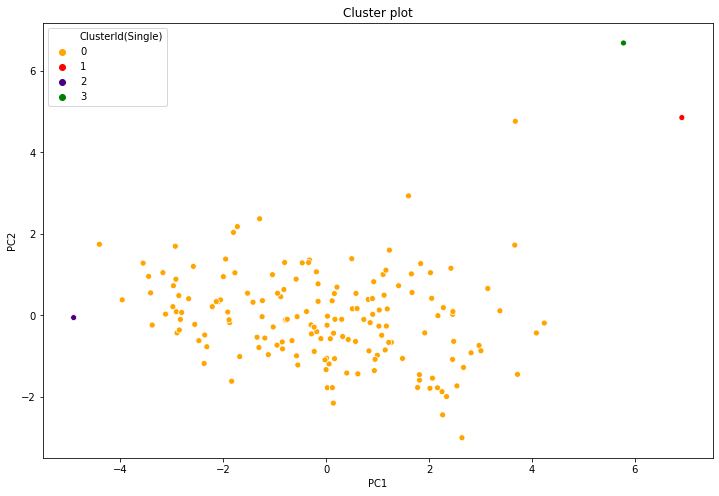

In [170]:
clusterplot(transformed_df,'ClusterId(Single)',colors_map4)

- Box plots

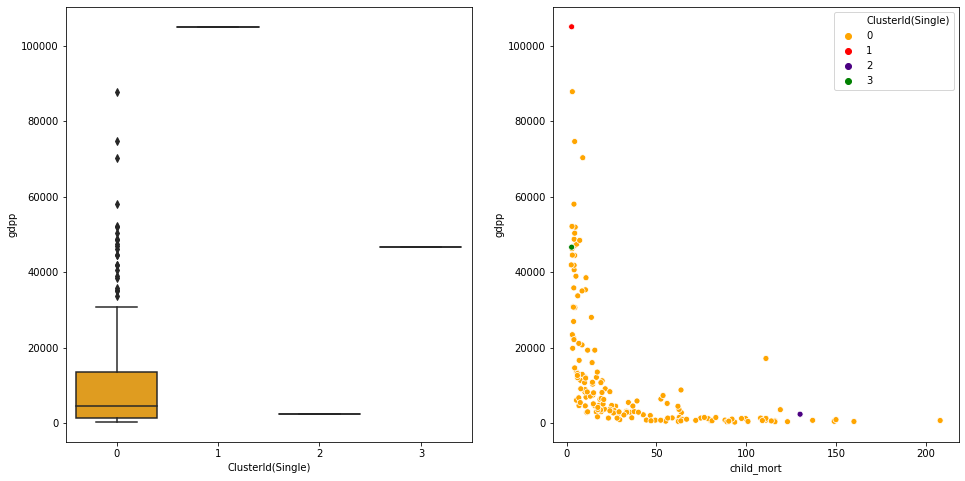

In [171]:
box_scatterplot(Countries_df,colors_map4,'ClusterId(Single)','gdpp','child_mort')

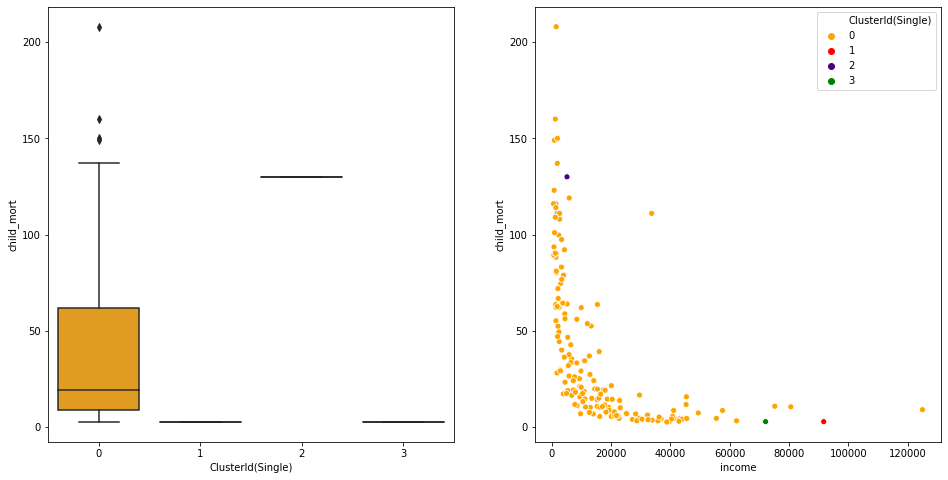

In [172]:
box_scatterplot(Countries_df,colors_map4,'ClusterId(Single)','child_mort','income')

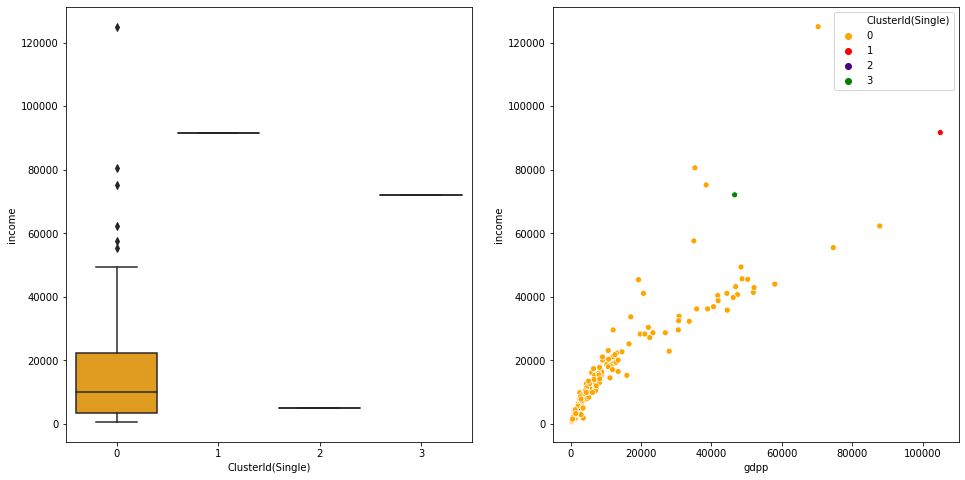

In [173]:
box_scatterplot(Countries_df,colors_map4,'ClusterId(Single)','income','gdpp')

In [174]:
# countries with ClusterId(Single) as 2 are in need of finanical need

In [175]:
Countries_df[Countries_df['ClusterId(Single)']==2]['country']

113    Nigeria
Name: country, dtype: object

In [176]:
len(Countries_df[Countries_df['ClusterId(Single)']==2]['country'])

1

- single linakge using transformed data without outliers

In [177]:
transformed_df_without_outliers_after_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId
0,-2.912825,0.007353,0.994739,0.842326,-0.097198,1
1,0.447734,-0.484230,0.147360,-1.245035,0.260700,0
2,-0.268469,-0.585717,-1.361241,-0.607862,0.145577,0
3,-2.945433,1.459815,-1.503047,1.234504,-0.429468,1
4,1.085925,0.290989,0.002541,-0.875351,-0.158428,0


In [178]:
#creating a single linkage on transformed data without outlier
single_linkage_without_outliers_after_pca=linkage(transformed_df_without_outliers_after_pca.iloc[:,:5],method='single')

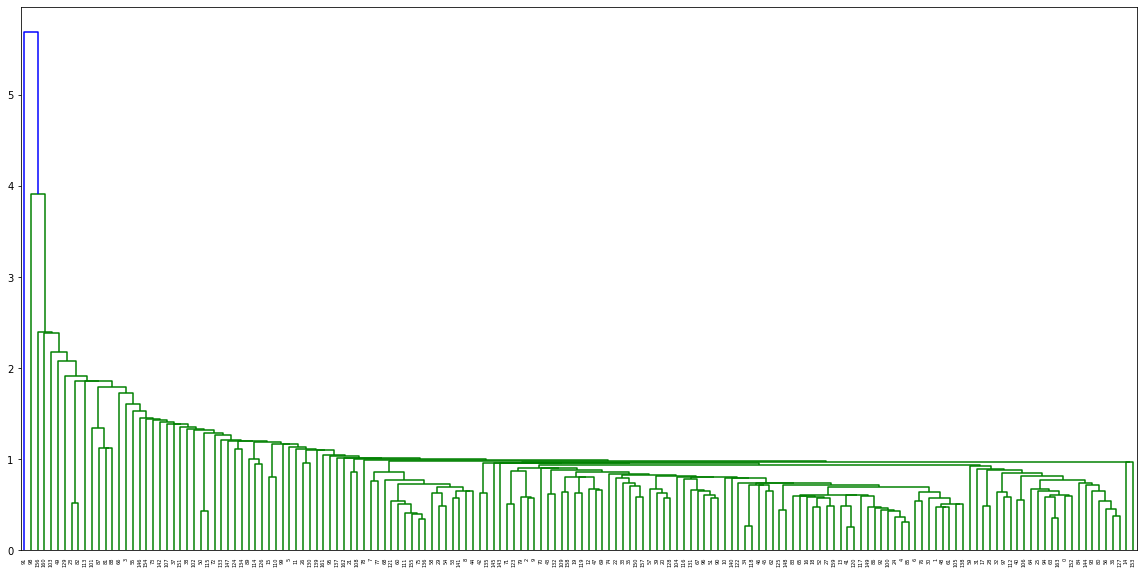

In [179]:
#ploting the formed single linkage dendogram
plt.figure(figsize=(20,10))
dendrogram(single_linkage_without_outliers_after_pca)
plt.show()

In [180]:
#cutting the tree to form 5 clusters
single_cluster_labels_without_outlier_after_pca=cut_tree(single_linkage_without_outliers_after_pca,
                                                         n_clusters=5).reshape(-1,)

In [181]:
#adding the output labels to original dataframe without outliers after pca
Countries_df_without_outliers_after_pca['ClusterId(Single)']=single_cluster_labels_without_outlier_after_pca

In [182]:
#adding the output labels to transformed dataframe without outliers after pca
transformed_df_without_outliers_after_pca['ClusterId(Single)']=single_cluster_labels_without_outlier_after_pca

- Visualizing cluster plots for data frame without outlier after pca

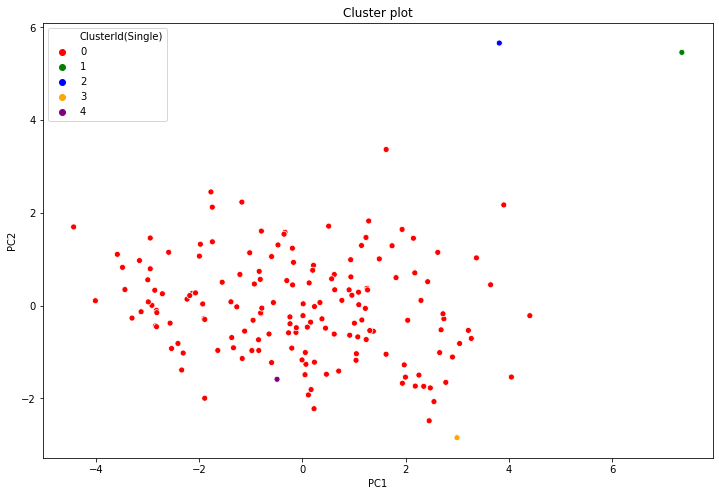

In [183]:
clusterplot(transformed_df_without_outliers_after_pca,'ClusterId(Single)',colors_map5)

- Visualizing Box plots for dataframe without outliers after pca

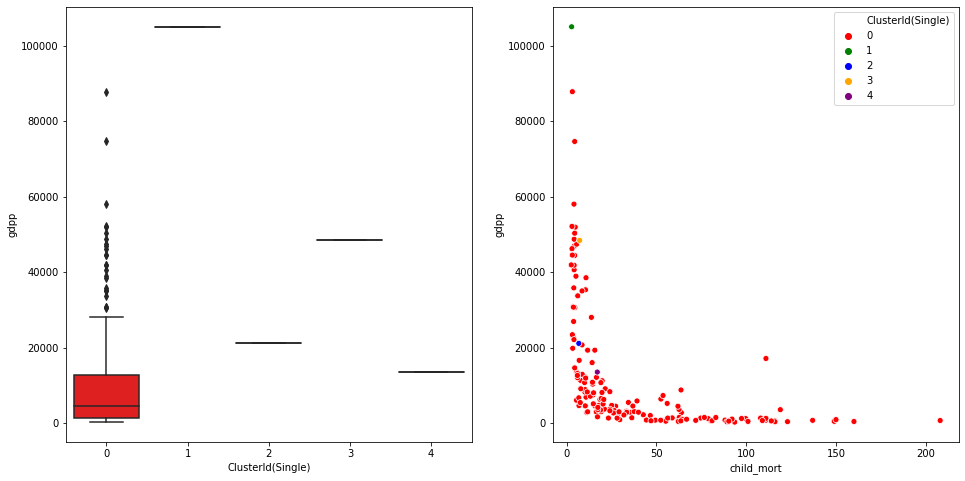

In [184]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(Single)','gdpp','child_mort')

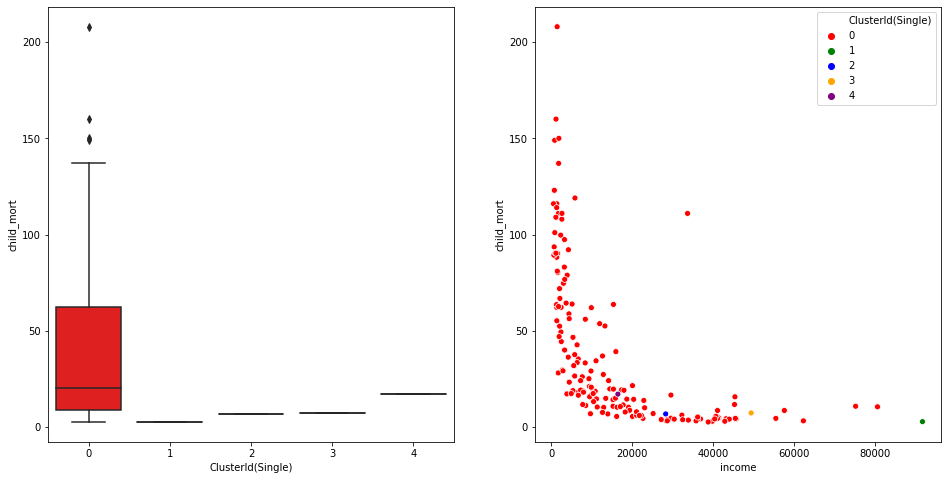

In [185]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(Single)','child_mort','income')

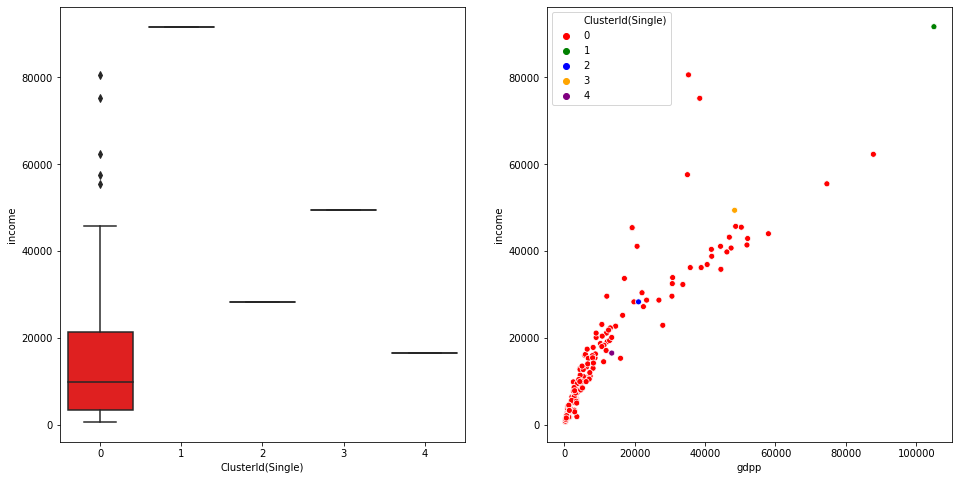

In [186]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(Single)','income','gdpp')

In [187]:
Countries_df_without_outliers_after_pca.groupby('ClusterId(Single)').count()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId
ClusterId(Single),,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160
1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1


In [188]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId(Single)']==0]['country'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

#### Single linkage clusters are not tight and formed clusters are not as desired

### Complete linkage

In [189]:
transformed_df.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,ClusterId(Single)
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,3,0
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,3,0
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,3,0


In [190]:
#creating a complete linkage on transformed data
complete_linkage=linkage(transformed_df.iloc[:,:5],method='complete')

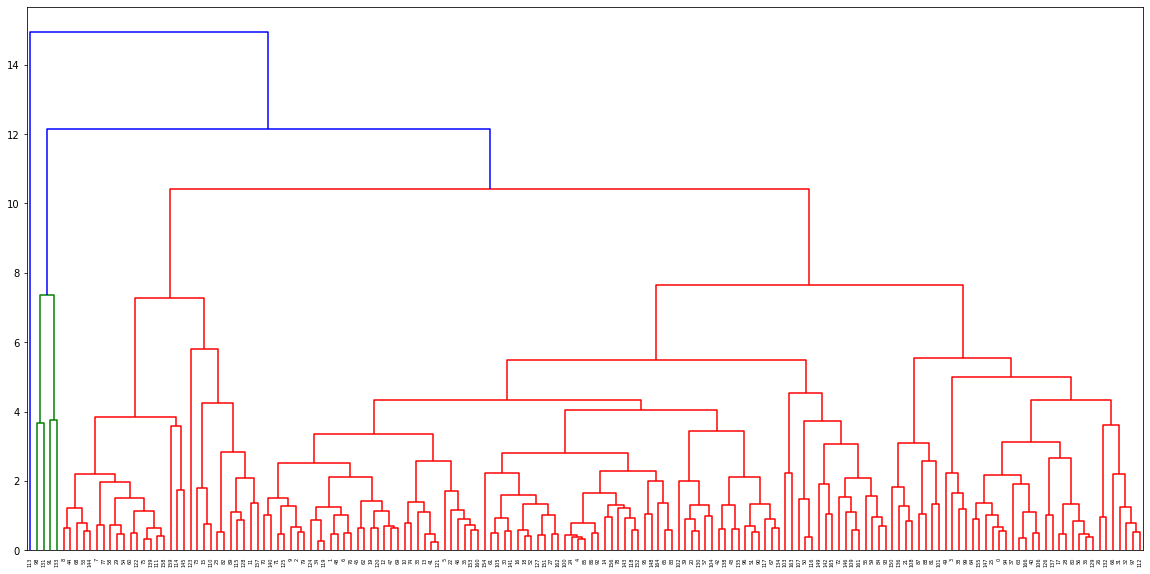

In [191]:
#ploting the formed complete linkage dendogram
plt.figure(figsize=(20,10))
dendrogram(complete_linkage)
plt.show()

In [192]:
#cutting the tree to form 5 clusters
complete_cluster_labels=cut_tree(complete_linkage,n_clusters=5).reshape(-1,)

In [193]:
#adding the output labels to original dataframe
Countries_df['ClusterId(complete)']=complete_cluster_labels

In [194]:
#adding the output labels to transformed dataframe 
transformed_df['ClusterId(complete)']=complete_cluster_labels

In [195]:
Countries_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterId,ClusterId(Single),ClusterId(complete)
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0,1


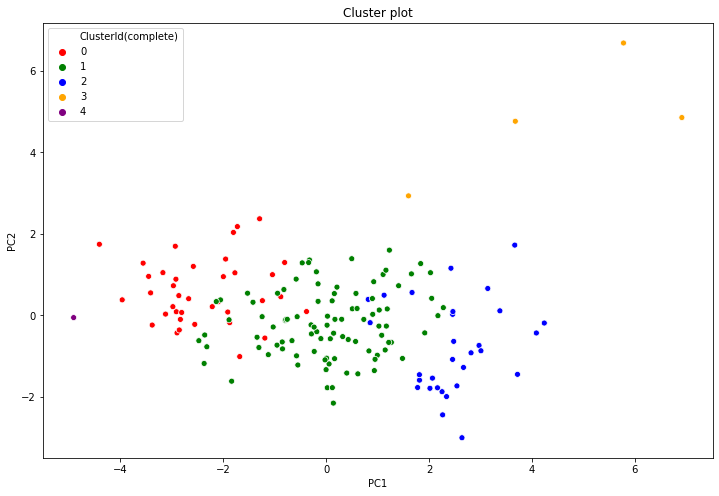

In [196]:
#visualizing the cluster plot
clusterplot(transformed_df,'ClusterId(complete)',colors_map5)

In [197]:
# visualizing box and scatter plots for gdpp

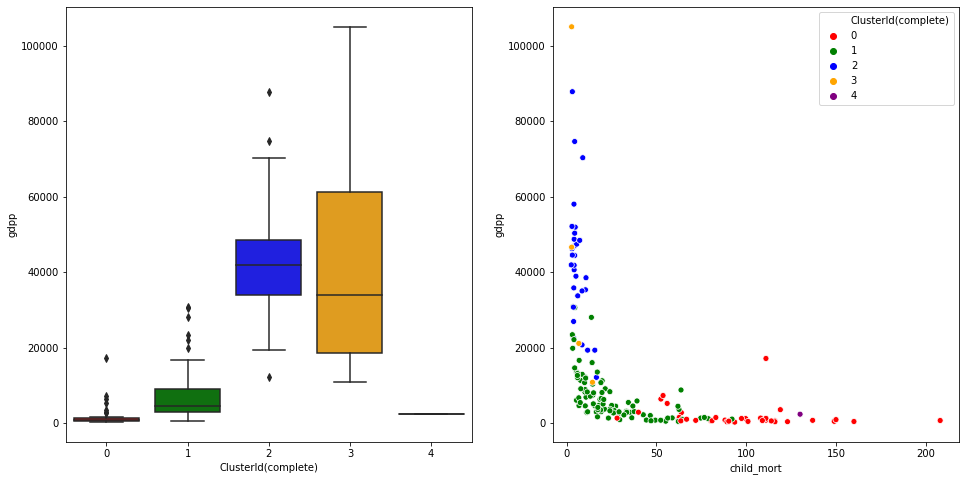

In [198]:
box_scatterplot(Countries_df,colors_map5,'ClusterId(complete)','gdpp','child_mort')

In [199]:
# visualizing box and scatter plots for child_mort

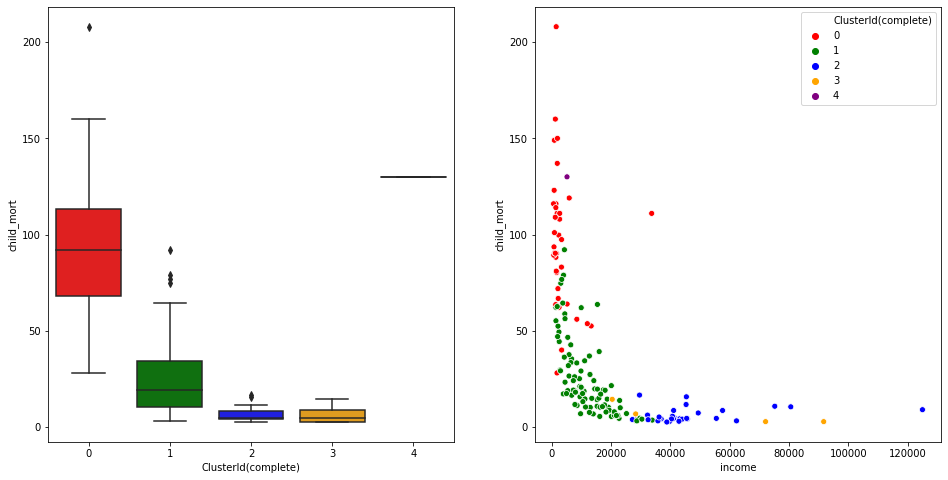

In [200]:
box_scatterplot(Countries_df,colors_map5,'ClusterId(complete)','child_mort','income')

In [201]:
# visualizing box and scatter plot for income

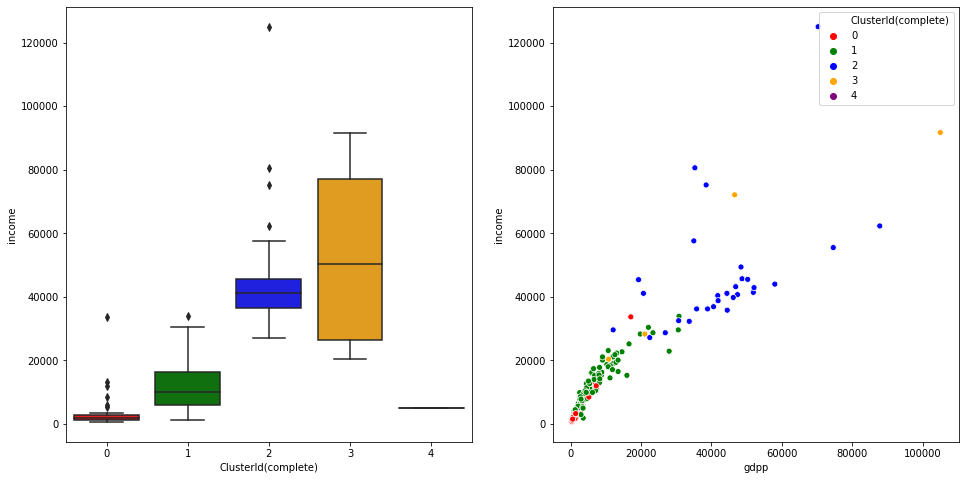

In [202]:
box_scatterplot(Countries_df,colors_map5,'ClusterId(complete)','income','gdpp')

#### From above box plots, cluster Id with high child mortality, low income and low gdpp is the cluster have countries that are in needs aid

In [203]:
#count of countries in each cluster
Countries_df.groupby('ClusterId(complete)').count()['country']

ClusterId(complete)
0    38
1    94
2    30
3     4
4     1
Name: country, dtype: int64

In [204]:
#list of countires
Countries_df[Countries_df['ClusterId(complete)']==0]['country'].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia',
       'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Tanzania', 'Togo', 'Uganda', 'Zambia'],
      dtype=object)

In [205]:
# complete linakge using transformed data without outliers

In [206]:
transformed_df_without_outliers_after_pca.head()

,PC1,PC2,PC3,PC4,PC5,ClusterId,ClusterId(Single)
0,-2.912825,0.007353,0.994739,0.842326,-0.097198,1,0
1,0.447734,-0.484230,0.147360,-1.245035,0.260700,0,0
2,-0.268469,-0.585717,-1.361241,-0.607862,0.145577,0,0
3,-2.945433,1.459815,-1.503047,1.234504,-0.429468,1,0
4,1.085925,0.290989,0.002541,-0.875351,-0.158428,0,0


In [207]:
#creating a complete linkage on transformed data without outliers
complete_linkage_without_outliers_after_pca=linkage(transformed_df_without_outliers_after_pca.iloc[:,:5],method='complete')

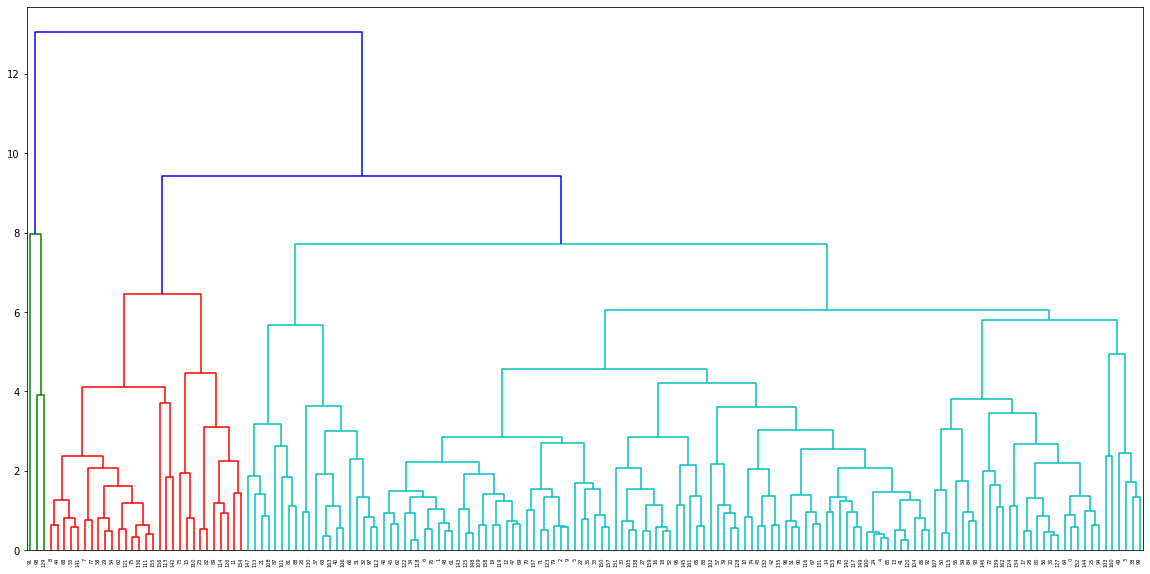

In [208]:
#ploting the formed complete linkage dendogram
plt.figure(figsize=(20,10))
dendrogram(complete_linkage_without_outliers_after_pca)
plt.show()

In [209]:
#cutting the tree to form 5 clusters
complete_cluster_labels_without_outliers_after_pca=cut_tree(complete_linkage_without_outliers_after_pca,
                                                            n_clusters=5).reshape(-1,)

In [210]:
#adding the output labels to original dataframe without outliers
Countries_df_without_outliers_after_pca['ClusterId(complete)']=complete_cluster_labels_without_outliers_after_pca

In [211]:
#adding the output labels to transformed dataframe without outliers
transformed_df_without_outliers_after_pca['ClusterId(complete)']=complete_cluster_labels_without_outliers_after_pca

In [212]:
# Visualizing Cluster plot

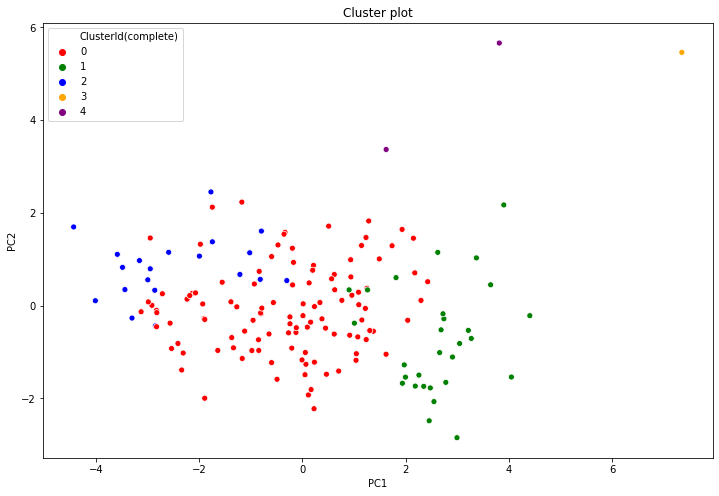

In [213]:
clusterplot(transformed_df_without_outliers_after_pca,'ClusterId(complete)',colors_map5)

In [214]:
# visualizing box and scatter plots for gdpp

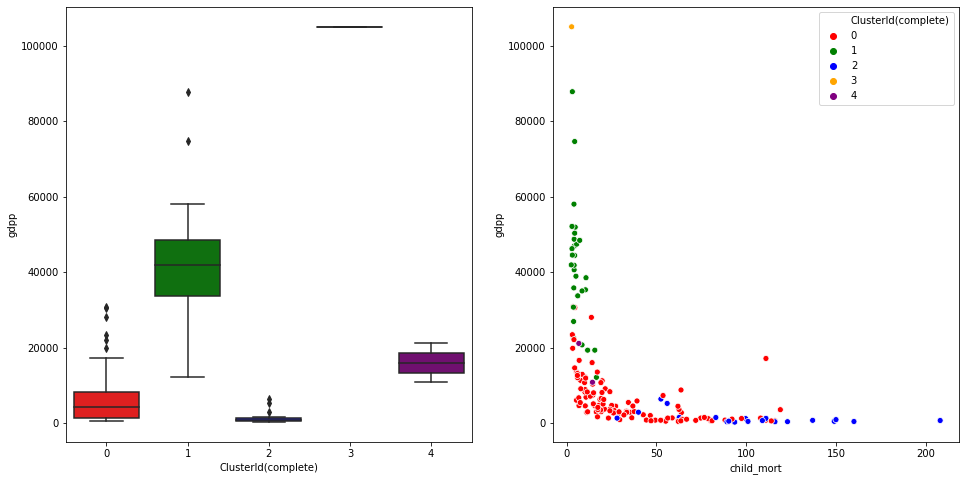

In [215]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(complete)','gdpp','child_mort')

In [216]:
# visualizing box and scatter plots for child_mort

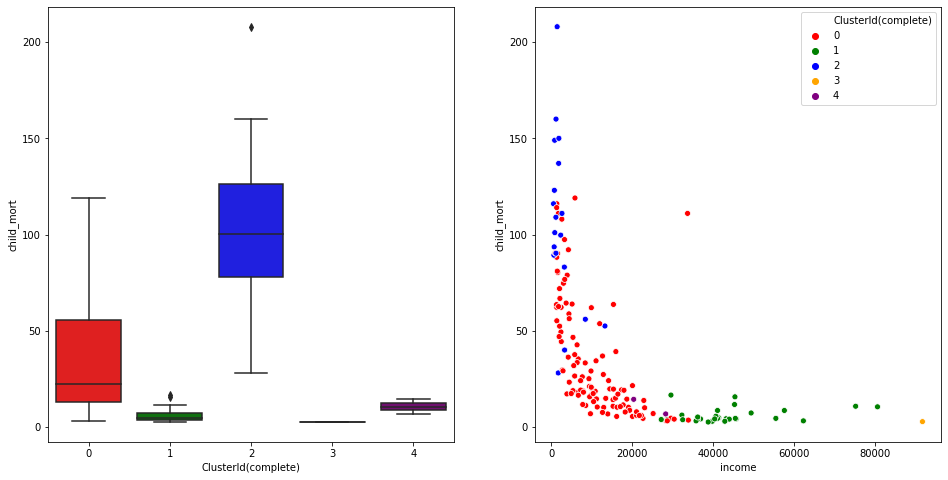

In [217]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(complete)','child_mort','income')

In [218]:
#visualizing box and scatter plots for income

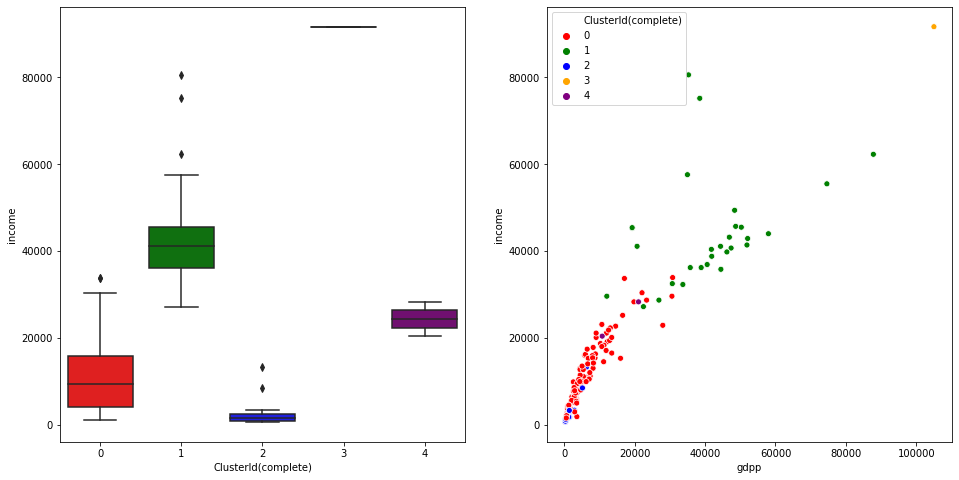

In [219]:
box_scatterplot(Countries_df_without_outliers_after_pca,colors_map5,'ClusterId(complete)','income','gdpp')

#### From above box plots, cluster Id with high child mortality, low income and low gdpp is the cluster have countries that are in needs aid

In [220]:
Countries_df_without_outliers_after_pca.groupby('ClusterId(complete)').count()['country']

ClusterId(complete)
0    112
1     29
2     20
3      1
4      2
Name: country, dtype: int64

In [221]:
Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId(complete)']==2]['country']

21                     Botswana
26                      Burundi
31     Central African Republic
32                         Chad
37             Congo, Dem. Rep.
40                Cote d'Ivoire
63                       Guinea
66                        Haiti
81                     Kiribati
87                      Lesotho
88                      Liberia
97                         Mali
101       Micronesia, Fed. Sts.
106                  Mozambique
108                     Namibia
112                       Niger
130                Sierra Leone
133             Solomon Islands
147                        Togo
163                      Zambia
Name: country, dtype: object

### List of countries that are in direst need for aid

In [222]:
#KMeans clustering on data without outliers have gave most of the countries that need aid. So, choosing it as final list
Countries_df_without_outliers_after_pca.groupby('ClusterId').mean().iloc[:,:9]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
ClusterId,,,,,,,,,
0,21.415663,40.727470,6.251928,48.044578,12409.036145,7.607663,72.886747,2.306265,6552.698795
1,91.565957,28.615298,6.322553,41.954594,3911.978723,9.956702,59.321277,4.935106,1893.829787
2,4.947059,54.479412,9.156176,48.702941,42561.764706,2.624441,80.070588,1.761176,41555.882353


In [223]:
aid_needed_countries=Countries_df_without_outliers_after_pca[Countries_df_without_outliers_after_pca['ClusterId']==1]

In [224]:
aid_needed_countries['country'].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Niger',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [225]:
#sorted the dataframe with low income, low gdpp and high child_mort, which prioritizes the countries that need help
aid_needed_countries_sorted=aid_needed_countries.sort_values(by=['income','gdpp','child_mort'],ascending=[True,True,False])

In [226]:
aid_needed_countries_sorted['country']

37             Congo, Dem. Rep.
88                      Liberia
26                      Burundi
112                       Niger
31     Central African Republic
106                  Mozambique
94                       Malawi
63                       Guinea
147                        Togo
130                Sierra Leone
124                      Rwanda
93                   Madagascar
64                Guinea-Bissau
36                      Comoros
50                      Eritrea
25                 Burkina Faso
66                        Haiti
152                      Uganda
0                   Afghanistan
56                       Gambia
81                     Kiribati
17                        Benin
146                 Timor-Leste
97                         Mali
32                         Chad
144                    Tanzania
127                     Senegal
87                      Lesotho
80                        Kenya
28                     Cameroon
40                Cote d'Ivoire
59      

In [227]:
aid_needed_countries_sorted['country'].values

array(['Congo, Dem. Rep.', 'Liberia', 'Burundi', 'Niger',
       'Central African Republic', 'Mozambique', 'Malawi', 'Guinea',
       'Togo', 'Sierra Leone', 'Rwanda', 'Madagascar', 'Guinea-Bissau',
       'Comoros', 'Eritrea', 'Burkina Faso', 'Haiti', 'Uganda',
       'Afghanistan', 'Gambia', 'Kiribati', 'Benin', 'Timor-Leste',
       'Mali', 'Chad', 'Tanzania', 'Senegal', 'Lesotho', 'Kenya',
       'Cameroon', "Cote d'Ivoire", 'Ghana', 'Zambia', 'Mauritania',
       'Sudan', 'Myanmar', 'Lao', 'Pakistan', 'Yemen', 'Congo, Rep.',
       'Angola', 'Namibia', 'South Africa', 'Iraq', 'Botswana', 'Gabon',
       'Equatorial Guinea'], dtype=object)